 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>

This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.

c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.

d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.


In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Part d: Least square Accuracy (labels: 0 for class1, 1 for class2): 86.25


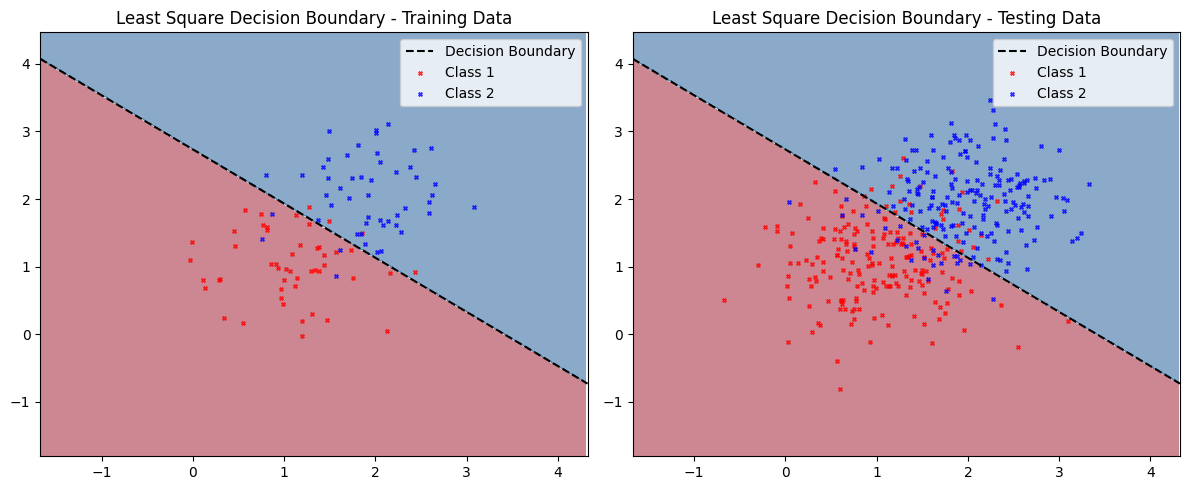

Part e: Least square Accuracy (labels: -1 for class1, 1 for class2): 86.25


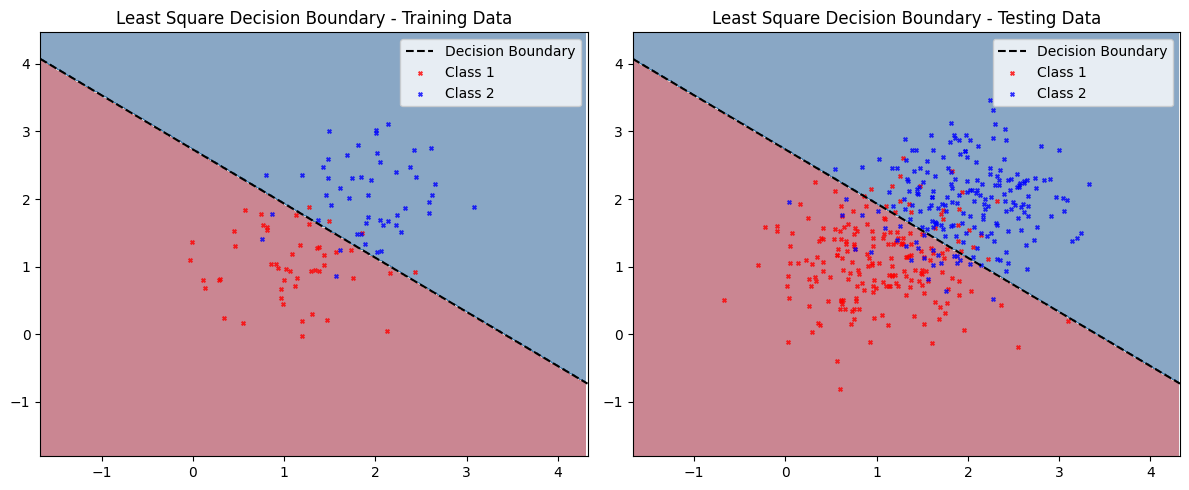

Part f: Laplacian distribution accuracy: 91.75


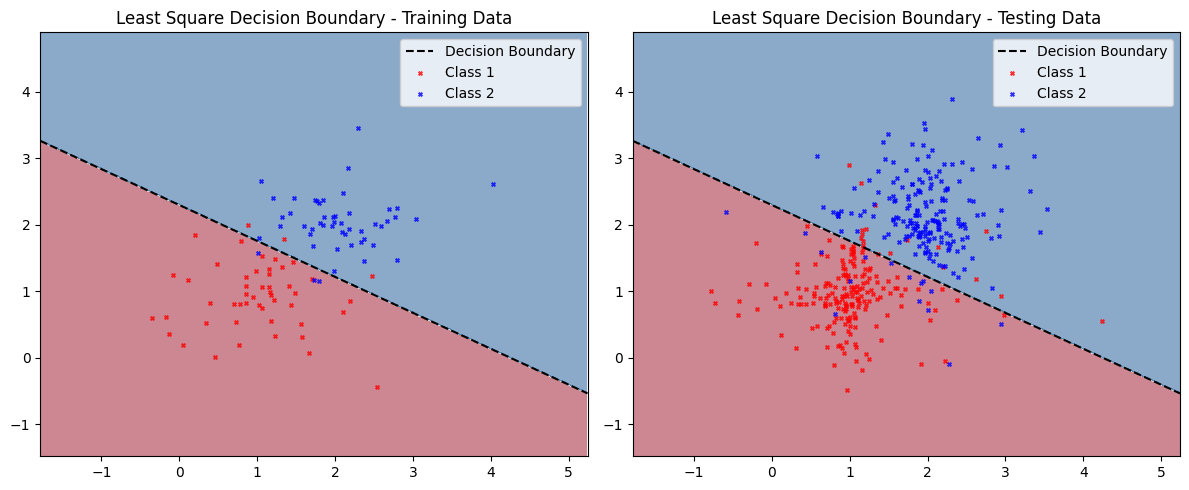

In [5]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    # Add a bias term 
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    #Impliment pseudo inverse solution to get the weight vector
    pseudo_inv = np.linalg.inv(X_train.T@X_train)@X_train.T
    w = pseudo_inv.dot(Y_train)

    #Predict the lables of test data using the pseudo inverse solution
    pred = X_test.dot(w)
    label1 = Y_train[0]
    for i in range(1, len(Y_train)):
        if Y_train[i] != label1:
            label2 = Y_train[i]
            break
    threshold = (label1 + label2) / 2
    labelc1 = max(label1, label2)
    labelc2 = min(label1, label2)
    pred = np.where(pred >= threshold, labelc1, labelc2)

    #Return the predicted test labels
    return pred

#Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    accuracy = np.mean(Y_test == Y_pred)

    #Return the accuracy
    return accuracy

##########################################
#Part-1)-d: Visualize the decision boundary
##########################################

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(tr_data, tr_targets, te_data, te_targets, w):
    # Create a mesh to plot in
    x_min, x_max = np.vstack((tr_data, te_data))[:, 0].min() - 1, np.vstack((tr_data, te_data))[:, 0].max() + 1
    y_min, y_max = np.vstack((tr_data, te_data))[:, 1].min() - 1, np.vstack((tr_data, te_data))[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Add bias term
    mesh = np.c_[xx.ravel(), yy.ravel()]
    mesh = np.hstack((np.ones((mesh.shape[0], 1)), mesh))
    
    # Predictions for the mesh
    Z = mesh.dot(w)
    y_combined = np.hstack((tr_targets, te_targets))
    label1 = y_combined[0]
    for i in range(1, len(y_combined)):
        if y_combined[i] != label1:
            label2 = y_combined[i]
            break
    threshold = (label1 + label2) / 2
    labelc1 = max(label1, label2)
    labelc2 = min(label1, label2)
    Z = np.where(Z >= threshold, labelc1, labelc2)
    Z = Z.reshape(xx.shape)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    for i, data in enumerate([(tr_data, tr_targets, 'Training Data'), (te_data, te_targets, 'Testing Data')]):
        X, y, title = data
        # Plotting decision boundary
        x_values = np.array([x_min, x_max])
        y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2]) + threshold/w[2]  # Calculate the corresponding y values

        axs[i].plot(x_values, y_values, 'k--', label='Decision Boundary')
        axs[i].contourf(xx, yy, Z, alpha=0.5, cmap='RdBu')

        axs[i].scatter(X[y == label1, 0], X[y == label1, 1], c='r', label='Class 1', alpha=0.8, s=7, marker='x')
        axs[i].scatter(X[y == label2, 0], X[y == label2, 1], c='b', label='Class 2', alpha=0.8, s=7, marker='x')
        
        axs[i].set_xlim((x_min, x_max))
        axs[i].set_ylim((y_min, y_max))
        axs[i].set_title(f'Least Square Decision Boundary - {title}')
        axs[i].legend()

    plt.tight_layout()
    plt.show()


# Compute weights for visualization
X_train_bias = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
pseudo_inv = np.linalg.inv(X_train_bias.T@X_train_bias)@X_train_bias.T
w = pseudo_inv.dot(tr_targets)

predictions = LS_Classify(tr_data,tr_targets,te_data)

accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Part d: Least square Accuracy (labels: 0 for class1, 1 for class2):", accuracy*100)

plot_decision_boundary(tr_data,tr_targets, te_data, te_targets, w)

##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
tr_targets_new = np.where(tr_targets == 0, -1, 1)  # Change labels for training data
te_targets_new = np.where(te_targets == 0, -1, 1)  # Change labels for testing data

# Compute weights for visualization
w = pseudo_inv.dot(tr_targets_new)

predictions = LS_Classify(tr_data,tr_targets_new,te_data)
accuracy_changed_labels = LS_Classify_Accuracy(te_targets_new, predictions)
print("Part e: Least square Accuracy (labels: -1 for class1, 1 for class2):", accuracy_changed_labels*100)

plot_decision_boundary(tr_data,tr_targets_new, te_data, te_targets_new, w)

##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
scale = np.sqrt(0.3/2)

# Generate training data for Laplacian distribution
class1_tr_laplace = np.random.laplace(loc=mean1, scale=scale, size=(50, 2))
class2_tr_laplace = np.random.laplace(loc=mean2, scale=scale, size=(50, 2))
tr_data_laplace = np.vstack((class1_tr_laplace, class2_tr_laplace))
tr_targets_laplace = np.hstack((np.zeros(50), np.ones(50)))  # Labels remain the same

# Generate testing data for Laplacian distribution
class1_te_laplace = np.random.laplace(loc=mean1, scale=scale, size=(200, 2))
class2_te_laplace = np.random.laplace(loc=mean2, scale=scale, size=(200, 2))
te_data_laplace = np.vstack((class1_te_laplace, class2_te_laplace))
te_targets_laplace = np.hstack((np.zeros(200), np.ones(200)))  # Labels remain the same

predictions_laplace = LS_Classify(tr_data_laplace, tr_targets_laplace, te_data_laplace)

accuracy_laplace = LS_Classify_Accuracy(te_targets_laplace, predictions_laplace)
print("Part f: Laplacian distribution accuracy:", accuracy_laplace*100)

X_train_bias_laplace = np.hstack((np.ones((tr_data_laplace.shape[0], 1)), tr_data_laplace))
pseudo_inv_laplace = np.linalg.pinv(X_train_bias_laplace)
w_laplace = pseudo_inv_laplace.dot(tr_targets_laplace)

plot_decision_boundary(tr_data_laplace, tr_targets_laplace, te_data_laplace, te_targets_laplace, w_laplace)


<b> Report your observations </b>

1. Changing the labels from [0,1] to [-1,1] does not change the least squares result as the threshold depends on the class labels itself. When labels are [0,1] the threshold is 0.5, while when labels are [-1,1] the threshold is 0.0. The final predictions are compared with the threshold which lead to same results.

2. The accuracy of laplacian distribution depends on the scale parameter. Keeping the scale parameter as sqrt(0.3/2), we get the accuracy slightly higher than the gaussian distribution.


<b> Part - (2) : Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


Accuracy with LDA: 89.75


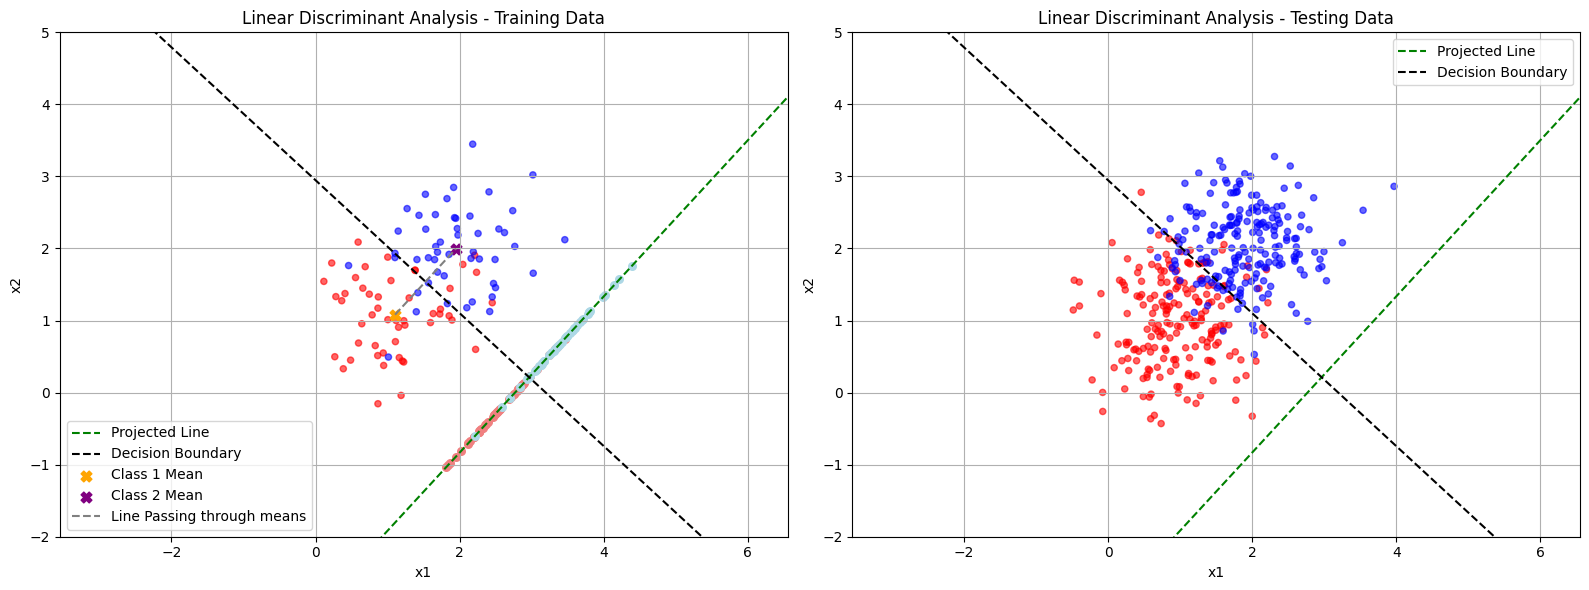

Accuracy with FDA: 89.0


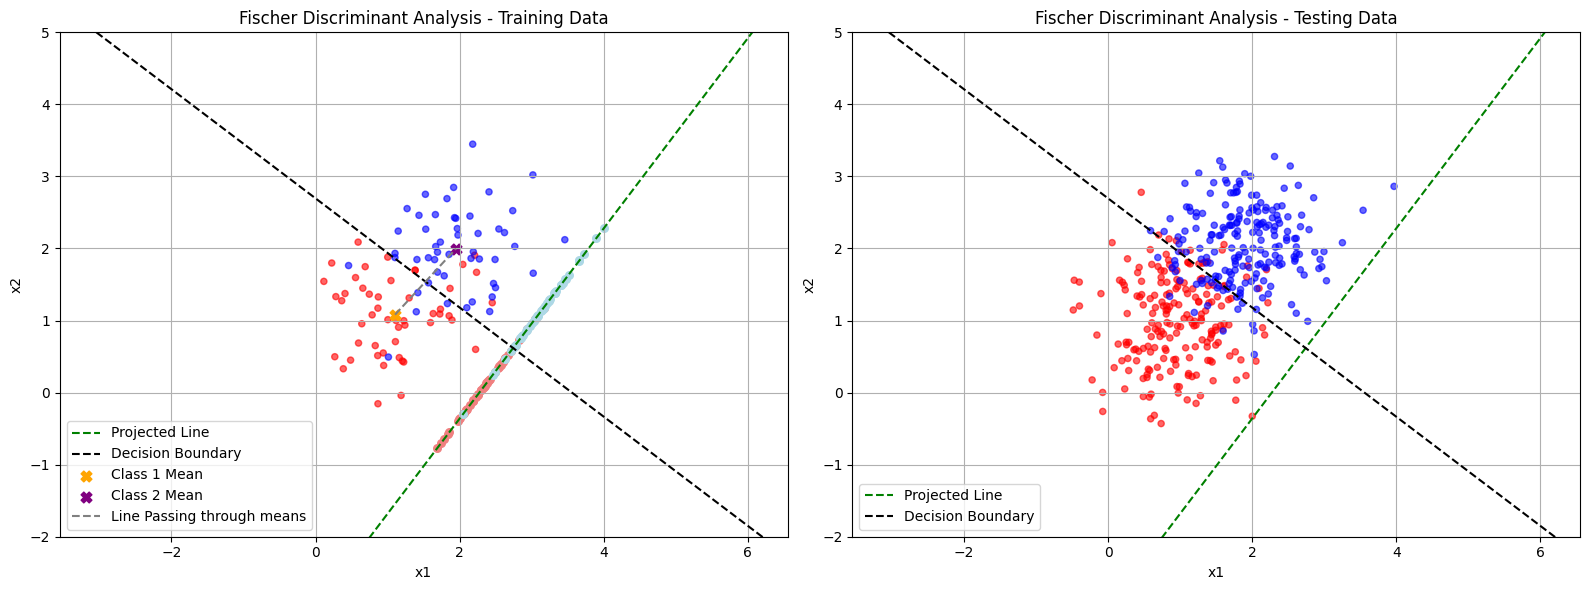

In [97]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.        #Class labels. Assign the value "0" to class1 and the value "1" to class2.

########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  # Mean vectors of each class
  m1 = np.mean(X_train[Y_train == 0], axis=0)
  m2 = np.mean(X_train[Y_train == 1], axis=0)
  
  # Between-class scatter matrix
  S_B = (m2-m1)@(m2-m1).T
  
  # Compute weight vector 
  # Since S_B is rank 1, we use the difference in means for direction
  w = m2 - m1
  
  #normalize w
  w = w/np.linalg.norm(w)

  # Project both classes onto the weight vector
  mu1 = w.T@m1
  mu2 = w.T@m2

  #Compute the threshold
  threshold = (mu1 + mu2) / 2

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projected_test_data = X_test@w

  #predictions 
  predictions = (projected_test_data > threshold).astype(int)   

  #Return weight vector and the predictions on testing data
  return predictions, w ,threshold

def LDA_project(w, X_train, Y_train, X_test, Y_test, threshold):

    # Define the slope and intercept for the projected line and decision boundary
    slope = w[1] / w[0]
    # Here we're using a range for the projected space that should cover both training and test data
    projected_space = np.array([min(np.min(X_train[:, 0]), np.min(X_test[:, 0]))-100, 
                                max(np.max(X_train[:, 0]), np.max(X_test[:, 0]))+100])
    c = -3  # This is an arbitrary shift for the projected line
    projected_line = projected_space * slope + c
    decision_boundary_line = (threshold - w[0]*projected_space) / w[1]

    # Calculate projection points
    projections = []
    for point in X_train:
        perp_slope = -1 / slope
        perp_intercept = point[1] - (perp_slope * point[0])
        x_intersect = (perp_intercept - c) / (slope - perp_slope)
        y_intersect = (slope * x_intersect) + c
        projections.append([x_intersect, y_intersect])

    projections = np.array(projections)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot for training data
    axs[0].plot(projected_space, projected_line, label="Projected Line", linestyle='dashed', color='green')
    axs[0].plot(projected_space, decision_boundary_line, label="Decision Boundary", linestyle='dashed', color='black')
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.6, cmap=ListedColormap(['red', 'blue']), s=20)
    m1 = np.mean(X_train[Y_train == 0], axis=0)
    m2 = np.mean(X_train[Y_train == 1], axis=0)
    axs[0].scatter(m1[0], m1[1], marker='X' ,color='orange', label='Class 1 Mean',s=60)
    axs[0].scatter(m2[0], m2[1], marker='X', color='purple', label='Class 2 Mean',s=60)
    axs[0].plot([m1[0], m2[0]], [m1[1], m2[1]], color='grey', linestyle='dashed', label='Line Passing through means')
    for label, color in zip([0, 1], ['lightcoral', 'lightblue']):
      label_projections = projections[Y_train == label]
      for proj_point in label_projections:
          axs[0].scatter(*proj_point, color=color, alpha=1, s=30)
    axs[0].set_title('Linear Discriminant Analysis - Training Data')
    
    # Subplot for testing data
    axs[1].plot(projected_space, projected_line, label="Projected Line", linestyle='dashed', color='green')
    axs[1].plot(projected_space, decision_boundary_line, label="Decision Boundary", linestyle='dashed', color='black')
    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.6, cmap=ListedColormap(['red', 'blue']), s=20)
    axs[1].set_title('Linear Discriminant Analysis - Testing Data')
    
    # Set properties for both subplots
    for ax in axs:
        ax.legend()
        ax.grid(True)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.axis('equal')
        ax.set_xlim((-2,5))
        ax.set_ylim((-2,5))

    plt.tight_layout()
    plt.show()


predictions, w_lda , threshold= LDA_classify(tr_data, tr_targets, te_data)
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc*100)
LDA_project(w_lda,tr_data,tr_targets, te_data, te_targets,threshold)

# print(f'Slope = {w_lda[1]/w_lda[0]}')

########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  m1 = np.mean(X_train[Y_train == 0], axis=0)
  m2 = np.mean(X_train[Y_train == 1], axis=0)

  # Between-class Covariance matrix
  S_B = (m2-m1)@(m2-m1).T

  # Within-class covariance matrix
  n = X_train.shape[1]
  S_W = np.zeros((n,n))

  # Class 1 points
  for x_n in X_train[Y_train==0]:
      xm = (x_n - m1).reshape(-1, 1)  # Column vector
      S_W += xm @ xm.T  # Outer product

  # Class 2 points
  for x_n in X_train[Y_train==1]:
      xm = (x_n - m2).reshape(-1, 1)  # Column vector
      S_W += xm @ xm.T  # Outer product

  # print(S_W)

  #Compute the weight vector
  w = np.linalg.inv(S_W)@(m2-m1)

  #normalize w
  w = w/np.linalg.norm(w)

  #Compute the threshold
  mu1 = w.T@m1
  mu2 = w.T@m2
  threshold = (mu1 + mu2)/2
  
  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projected_test_data = X_test@w  
  predictions = (projected_test_data > threshold).astype(int)

  #Return weight vector and the predictions on testing data
  return w, predictions , threshold


def FDA_project(w, X_train,Y_train,X_test , Y_test,threshold):
  #Inputs: weight vector, testing data, and testing labels

  # Define the slope and intercept for the projected line and decision boundary
    slope = w[1] / w[0]
    # Here we're using a range for the projected space that should cover both training and test data
    projected_space = np.array([min(np.min(X_train[:, 0]), np.min(X_test[:, 0]))-100, 
                                max(np.max(X_train[:, 0]), np.max(X_test[:, 0]))+100])
    c = -3  # This is an arbitrary shift for the projected line
    projected_line = projected_space * slope + c
    decision_boundary_line = (threshold - w[0]*projected_space) / w[1]

    # Calculate projection points
    projections = []
    for point in X_train:
        perp_slope = -1 / slope
        perp_intercept = point[1] - (perp_slope * point[0])
        x_intersect = (perp_intercept - c) / (slope - perp_slope)
        y_intersect = (slope * x_intersect) + c
        projections.append([x_intersect, y_intersect])

    projections = np.array(projections)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot for training data
    axs[0].plot(projected_space, projected_line, label="Projected Line", linestyle='dashed', color='green')
    axs[0].plot(projected_space, decision_boundary_line, label="Decision Boundary", linestyle='dashed', color='black')
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.6, cmap=ListedColormap(['red', 'blue']), s=20)
    m1 = np.mean(X_train[Y_train == 0], axis=0)
    m2 = np.mean(X_train[Y_train == 1], axis=0)
    axs[0].scatter(m1[0], m1[1], marker='X' ,color='orange', label='Class 1 Mean',s=60)
    axs[0].scatter(m2[0], m2[1], marker='X', color='purple', label='Class 2 Mean',s=60)
    axs[0].plot([m1[0], m2[0]], [m1[1], m2[1]], color='grey', linestyle='dashed', label='Line Passing through means')
    for label, color in zip([0, 1], ['lightcoral', 'lightblue']):
      label_projections = projections[Y_train == label]
      for proj_point in label_projections:
          axs[0].scatter(*proj_point, color=color, alpha=1, s=30)
    axs[0].set_title('Fischer Discriminant Analysis - Training Data')
    
    # Subplot for testing data
    axs[1].plot(projected_space, projected_line, label="Projected Line", linestyle='dashed', color='green')
    axs[1].plot(projected_space, decision_boundary_line, label="Decision Boundary", linestyle='dashed', color='black')
    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.6, cmap=ListedColormap(['red', 'blue']), s=20)
    axs[1].set_title('Fischer Discriminant Analysis - Testing Data')
    
    # Set properties for both subplots
    for ax in axs:
        ax.legend()
        ax.grid(True)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.axis('equal')
        ax.set_xlim((-2,5))
        ax.set_ylim((-2,5))

    plt.tight_layout()
    plt.show()


w_fda, predictions_fda,threshold = FDA_classify(tr_data, tr_targets, te_data)

#Compute and print the accuracy
acc = np.mean(predictions_fda == te_targets)
print('Accuracy with FDA:', acc*100)

FDA_project(w_fda, tr_data,tr_targets,te_data, te_targets,threshold)

# print(f'Slope = {w_fda[1]/w_fda[0]}')

### Observations:

- The decision boundaries for Linear Discriminant Analysis (LDA) and Fisher Discriminant Analysis (FDA) are nearly overlapping in both the training and testing data visualizations.
- The projected lines for both LDA and FDA, which indicate the direction along which the data is to be projected for maximum class separability, are also coinciding in the training and testing sets.
- The class means are situated on opposite sides of the decision boundaries, and the line passing through the means is nearly perpendicular to the decision boundaries for both methods.
- The scatter of data points in both classes is homogeneous and does not show any evident skewness or elongation in any particular direction, indicating isotropic variance.
- The accuracy rates of LDA and FDA are quite similar (89.75 and 89 respectively).
### Reasoning:

*   The similar performance of LDA and FDA, as well as their decision boundaries, can be primarily attributed to the nature of the covariance matrix \[0.3000.3\]\\begin{bmatrix}0.3 & 0\\\\ 0 & 0.3\\end{bmatrix}\[0.30​00.3​\], which is isotropic.
*   In LDA, the assumption of equal covariances in each class leads to a decision boundary that is fundamentally based on the difference between the means of the classes. Since FDA also seeks a projection that maximizes the distance between class means while minimizing within-class variance, the isotropic nature of the covariance does not leave much room for FDA to find a substantially different projection.
*   The perpendicular nature of the line through the means with respect to the decision boundary suggests that the most significant axis of class separation is indeed the one directly between the means, which both LDA and FDA will naturally discover.
*   The equal spread of data points across both axes implies that the data variance does not contribute differently across the dimensions. Hence, the FDA does not gain any additional benefit over LDA in such a scenario, as the latter is already optimized for class separation based on mean differences.
*   The similar projected lines from LDA and FDA indicate that both methods are effectively capturing the same axis of maximum class differentiation, further emphasizing the point that FDA does not provide any added advantage when the covariance matrix is symmetric and identical for both classes.

Accuracy with LDA: 84.5


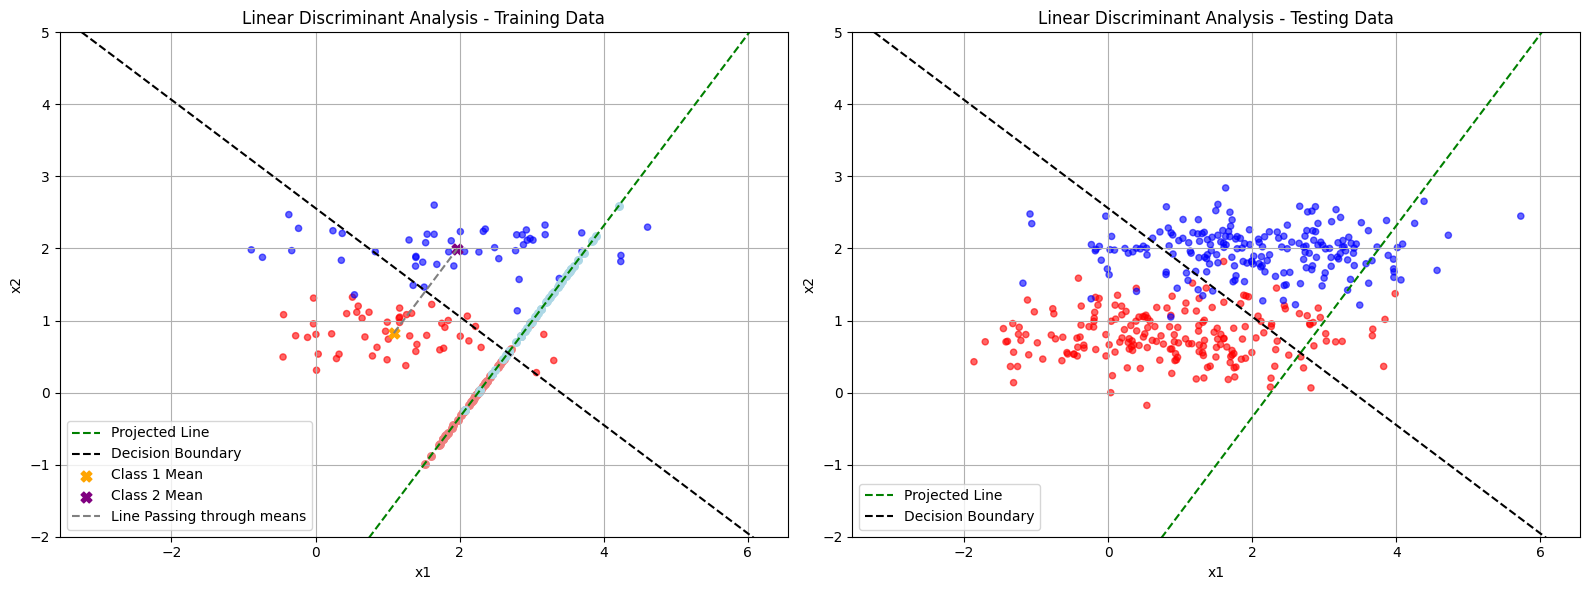

Accuracy with FDA: 96.0


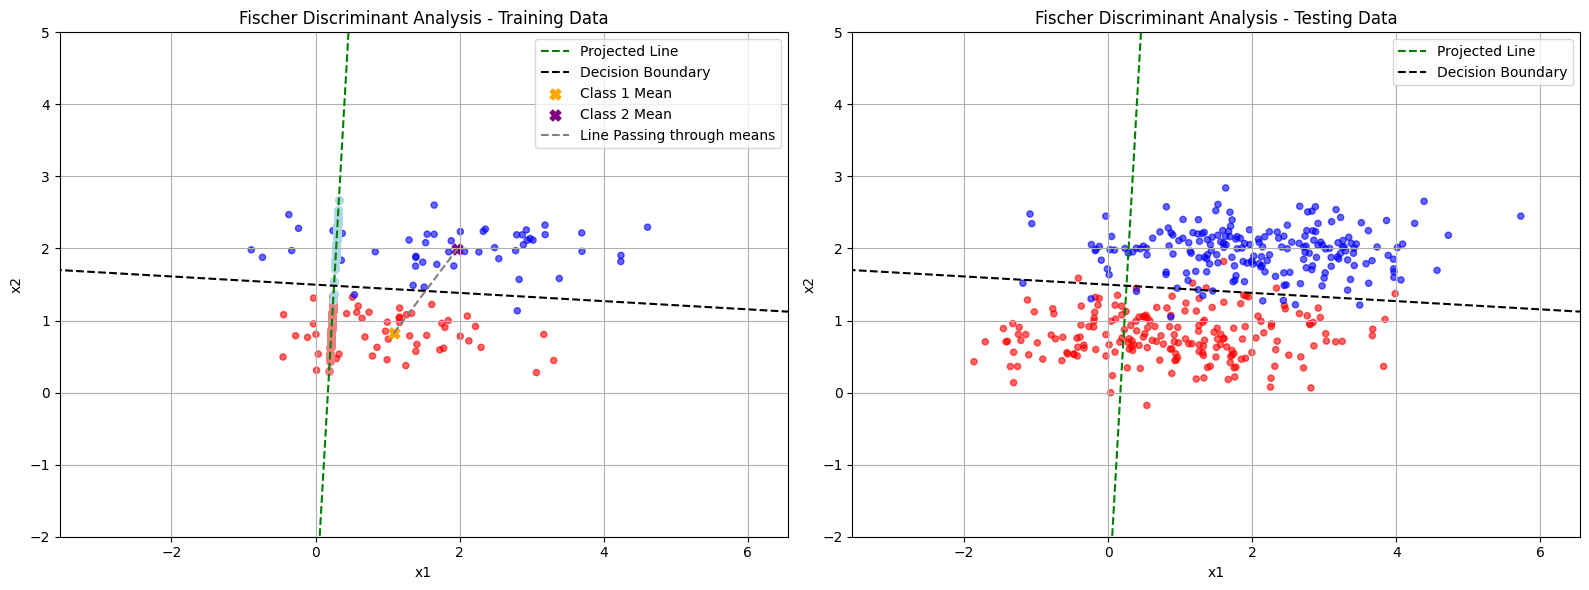

array([0.05699713, 0.99837434])

In [101]:
# Repeating Experiment with changed covarianve matrix

#Set the parameters of class distribution
mean1 = [0.8,0.8]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[1.4,0],[0,0.1]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.        #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#LDA
predictions_lda, w_lda, threshold = LDA_classify(tr_data, tr_targets, te_data)
acc = np.mean(predictions_lda == te_targets)
print('Accuracy with LDA:', acc*100)
LDA_project(w_lda,tr_data,tr_targets, te_data, te_targets,threshold)

#FDA
w_fda, predictions_fda,threshold = FDA_classify(tr_data, tr_targets, te_data)
acc = np.mean(predictions_fda == te_targets)
print('Accuracy with FDA:', acc*100)
FDA_project(w_fda, tr_data,tr_targets,te_data, te_targets,threshold)
w_fda

### Observations:

*   In the training data, the Linear Discriminant Analysis (LDA) decision boundary is not as effective in separating the two classes as the Fisher Discriminant Analysis (FDA) decision boundary.
*   In the testing data, the FDA's decision boundary appears to better encompass the red class while correctly classifying a higher number of blue class points, compared to the LDA boundary.
*   The difference in accuracy between LDA and FDA is significant, with LDA at 84.5% and FDA at 96.0%.
*   The LDA boundary does not adapt well to the elongated distribution of the blue class, leading to several misclassifications, especially in the testing data.
*   The FDA's projected line is closely aligned with the major axis of the blue class distribution, suggesting that FDA is successfully identifying the optimal projection for class separation.

### Reasoning:

*   The discrepancy in performance is due to the difference in the covariance matrix used for the dataset. Unlike the earlier example with equal variances along both axes, this covariance matrix \[1.4000.1\]\\begin{bmatrix}1.4 & 0\\\\ 0 & 0.1\\end{bmatrix}\[1.40​00.1​\] indicates that the variance along the x1x\_1x1​ axis is significantly greater than along the x2x\_2x2​ axis. This leads to an elongated spread of the data along the x1x\_1x1​ axis.
*   LDA assumes equal covariance matrices for both classes, which means it is not adequately accounting for the significant difference in variance along the x1x\_1x1​ axis, hence the lower accuracy.
*   FDA does not make this assumption and instead looks for the projection that maximizes the separation between the classes. Given the elongated spread along x1x\_1x1​, FDA can take full advantage of this variance to find a projection that better separates the two classes, which is reflected in the higher accuracy.
*   The greater variance along x1x\_1x1​ axis means that the FDA is more sensitive to the spread of data in this direction, allowing it to separate the classes more effectively.
*   The projected line of FDA in the training data is almost vertical, illustrating that it has correctly identified the significant variance along x1x\_1x1​ and is using this to discriminate between the classes.
*   The LDA method is misled by the assumption of equal/isotropic covariance matrices, which is why its decision boundary does not align with the major spread of data, leading to poorer performance compared to FDA.



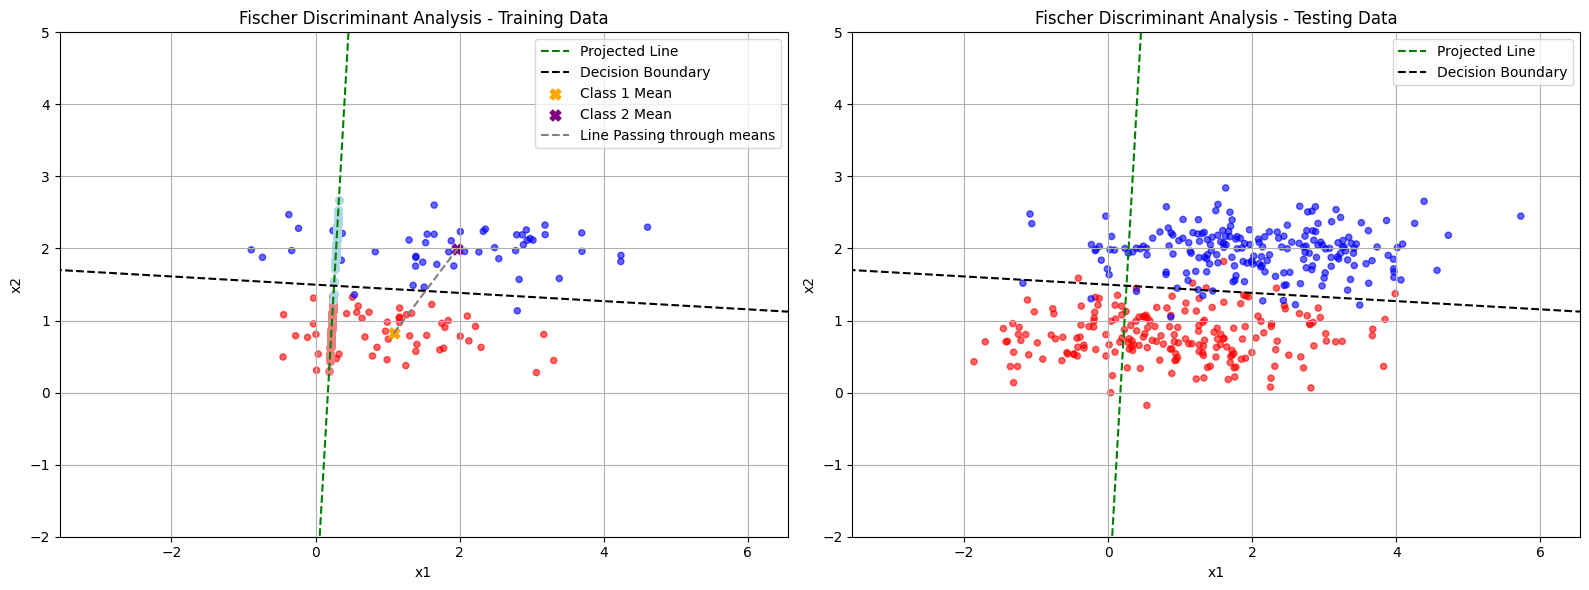

In [110]:
########################################
#Part-2)-(d)
########################################
def FDA_project_K(X,y,K):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Ouput: Projection matrix

  N, D = X.shape
  mT = np.mean(X,axis = 0)  #Total mean

  means = [] #Mean vectors for each class
  classes = np.unique(y)
  for cls in classes:
    means.append(np.mean(X[y==cls],axis = 0))

  #Within Class Scatter
  Sw = np.zeros((D,D))
  for k,mk in zip(classes,means):
    k_class_pts = X[y==k]
    Sk = np.zeros((D,D))
    for xn in k_class_pts:
      xn = np.reshape(xn,(-1,1))
      mk = np.reshape(mk,(-1,1))
      Sk += (xn - mk)@(xn - mk).T
    Sw += Sk

  #Between Class Scatter
  Sb = np.zeros((D,D))
  for mk in means:
    mk = np.reshape(mk,(-1,1))
    mT = np.reshape(mT,(-1,1))
    Nk = X[y==k].shape[0]
    Sb += Nk * (mk - mT)@(mk - mT).T    

  eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw)@(Sb))
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]    #make eigen (value, vector) pairs
  eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True) # Sort in descending order of eigen values
  w = np.hstack([eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(K)]) # Take top K eigen vectors

  threshold = w.T@np.mean(means, axis=0)
  #Compute and return the projection matrix
  return w,threshold

w_multi_fda , threshold = FDA_project_K(tr_data, tr_targets, 1)
FDA_project(w_multi_fda, tr_data,tr_targets,te_data, te_targets,threshold)

<b> Report your observations </b>

1.

2.

3.


<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.

e). Report your observations


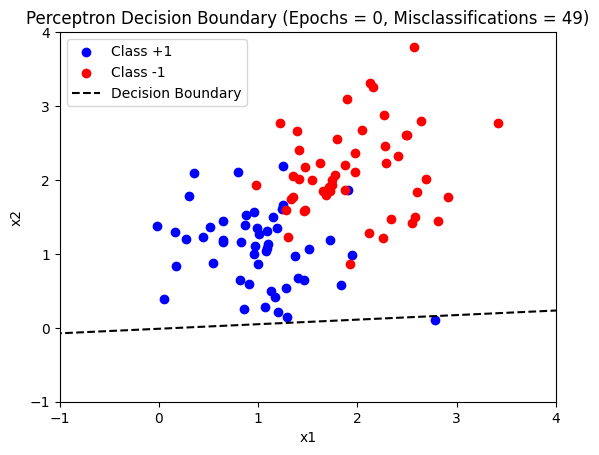

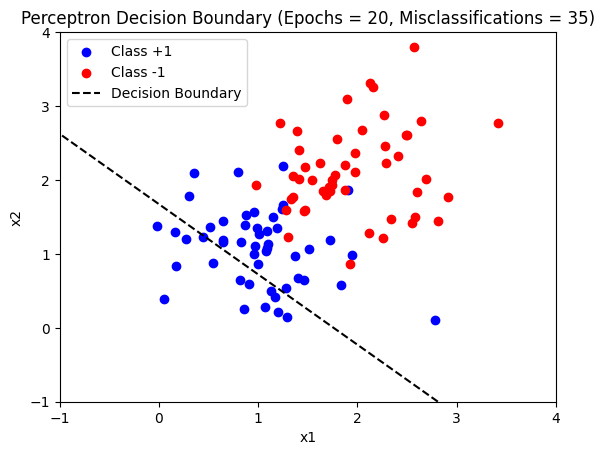

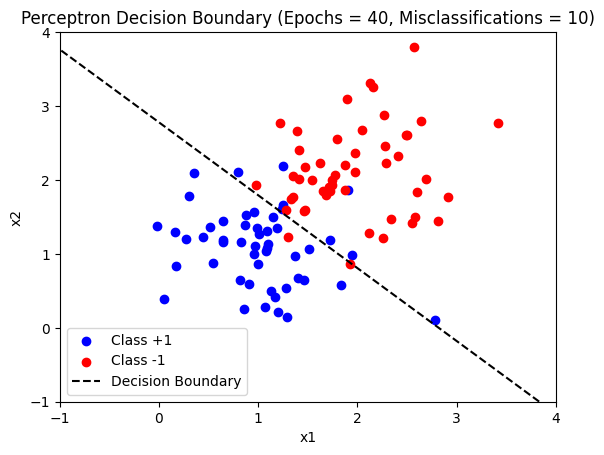

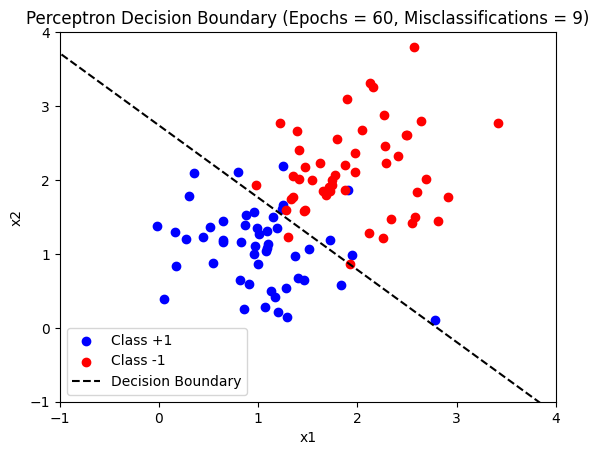

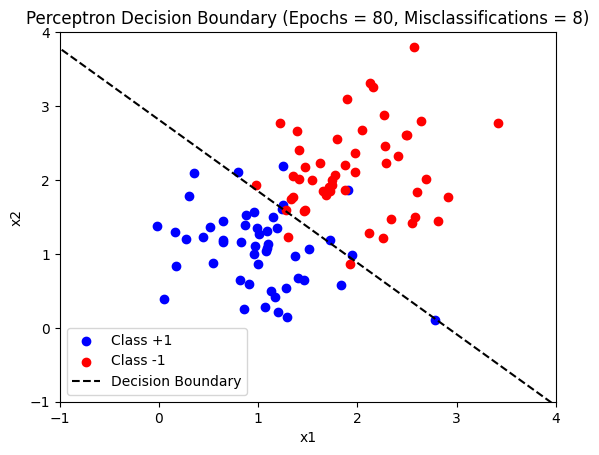

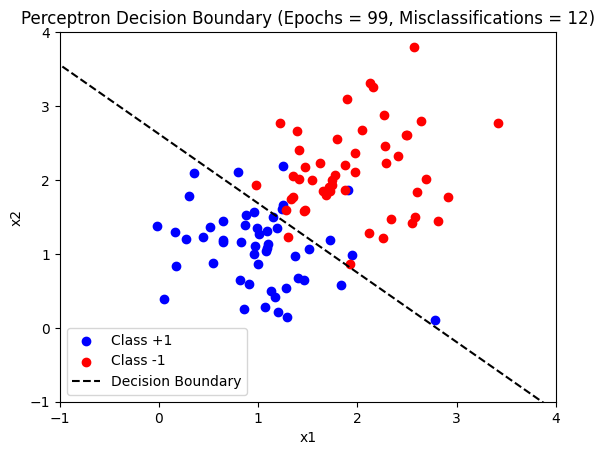

In [111]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.ones(50),-np.ones(50)))           #Class labels. Assign the value "+1" to class1 and the value "-1" to class2.


#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.ones(200),-np.ones(200)))            #Class labels. Assign the value "+1" to class1 and the value "-1" to class2.       

########################################
#Part-3)-(b)
########################################

def plot_data_and_boundary(w,points, labels,Epochs,missclassifications):
    
    #remove the bias term
    points = points[:,1:]
    
    # Create a scatter plot of the points
    class1_points = points[labels == +1]
    class2_points = points[labels == -1]
    plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class +1')
    plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class -1')

    # Plot the decision boundary - w0 + w1*x1 + w2*x2 = 0 , x2 = -(w1/w2)x1 - (w0/w2)
    x_values = np.linspace(points[:, 0].min()-40, points[:, 0].max()+40, 2)  # Just need two points to define a line
    y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2])
    plt.plot(x_values, y_values, 'k--', label='Decision Boundary')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Decision Boundary (Epochs = {Epochs}, Misclassifications = {missclassifications})')
    plt.xlim((-1,4))
    plt.ylim((-1,4))
    plt.legend()
    plt.show()

def Perceptron(X_train, Y_train, X_test, log):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    #Add a bias term to the training data
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    M = X_train.shape[1] #Number of features (input dimensions after adding the bias term)

    epochs = 100  #Number of epochs
    X = X_train          #Data. Append ones to the training data to take care of the bias
    w = np.random.randn(M)         #Initialize the weight vector (including the bias term)

    for epoch in range(0,epochs,1):
        missclassifications = []
        for i in range(0, len(X)):
            #Compute the prediction
            pred = +1 if (w.T@X[i]) >= 0 else -1
            if(pred!=Y_train[i]):
                missclassifications.append([X[i],Y_train[i]])

        if(epoch%20 == 0 and log):  
            plot_data_and_boundary(w,X_train,Y_train,epoch,len(missclassifications))
        
        #Convergence condition for the perceptron
        if len(missclassifications) == 0:
            break

        # Update the weight vector        
        for missclassified_point in missclassifications:
            # Wn = Wn-1 + sum(xn*tn)|missclassified point
            # W^n = W^n-1 + Xn*label = [w0,w1,w2] + [1,x1,x2] * label
            w = w + missclassified_point[0]*missclassified_point[1]   
            # print(w)
    
    if(log):
        plot_data_and_boundary(w,X_train,Y_train,epoch,len(missclassifications))
        

    #Compute the test data predicitions using the final weight vector
    predictions = [+1 if (w.T@x) >= 0 else -1 for x in X_test]

    #Return the test data predictions and the final weight vector
    return predictions, w

te_pred, w = Perceptron(tr_data, tr_targets, te_data,log=True)

- The perceptron algorithm terminated after maximum iterations (100) with 12 missclassifications


Accuracy with Perceptron: 88.75


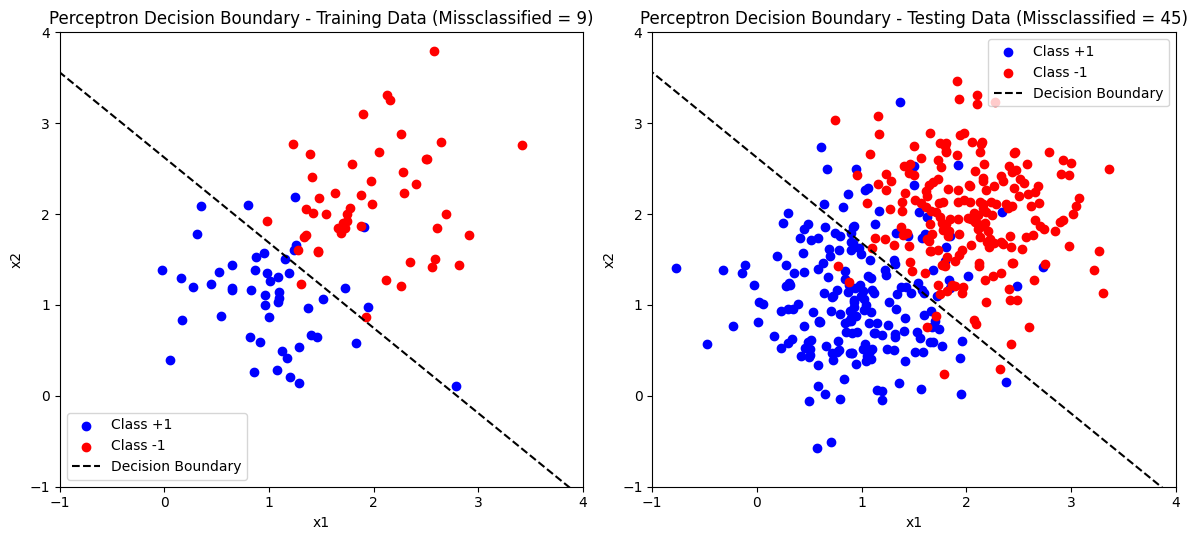

In [114]:
##########################################
#Plot the decision boundary using perceptron
##########################################
def plot_pereptron(w,tr_data,tr_targets,te_data,te_targets):
    class1_points_tr = tr_data[tr_targets == +1]
    class2_points_tr = tr_data[tr_targets == -1]
    class1_points_te = te_data[te_targets == +1]
    class2_points_te = te_data[te_targets == -1]

    fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

    # Plot for training data
    axs[0].scatter(class1_points_tr[:, 0], class1_points_tr[:, 1], color='blue', label='Class +1')
    axs[0].scatter(class2_points_tr[:, 0], class2_points_tr[:, 1], color='red', label='Class -1')

    # Plot the decision boundary for training data
    x_values_tr = np.linspace(tr_data[:, 0].min()-40, tr_data[:, 0].max()+40, 2)
    y_values_tr = -(w[1] / w[2]) * x_values_tr - (w[0] / w[2])
    axs[0].plot(x_values_tr, y_values_tr, 'k--', label='Decision Boundary')

    tr_pred = np.array([+1 if (w[0] + w[1] * x[0] + w[2] * x[1]) >= 0 else -1 for x in tr_data])

    # Calculate misclassifications for training data
    missclassifications_tr = sum(tr_pred != tr_targets)

    axs[0].set_title(f'Perceptron Decision Boundary - Training Data (Missclassified = {missclassifications_tr})')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[0].set_xlim((-1,4))
    axs[0].set_ylim((-1,4))
    axs[0].legend()

    # Plot for testing data 
    axs[1].scatter(class1_points_te[:, 0], class1_points_te[:, 1], color='blue', label='Class +1')
    axs[1].scatter(class2_points_te[:, 0], class2_points_te[:, 1], color='red', label='Class -1')
    x_values_te = np.linspace(te_data[:, 0].min()-40, te_data[:, 0].max()+40, 2)
    y_values_te = -(w[1] / w[2]) * x_values_te - (w[0] / w[2])
    axs[1].plot(x_values_te, y_values_te, 'k--', label='Decision Boundary')

    missclassifications_te = sum(te_pred != te_targets)

    axs[1].set_title(f'Perceptron Decision Boundary - Testing Data (Missclassified = {missclassifications_te})')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].set_xlim((-1,4))
    axs[1].set_ylim((-1,4))
    axs[1].legend()

    plt.tight_layout()
    plt.show()

acc = np.mean(te_pred == te_targets)
print('Accuracy with Perceptron:', acc*100)

plot_pereptron(w,tr_data,tr_targets,te_data,te_targets)

- Since, the data is not linearly seperable, the perceptron algorithm fails to converge in maximum iterations (100) , and terminates with 9 missclassifications in training data set. However, the decision boundary give good enough accuracy (89 %) on the testing data set.


Accuracy with Least Squares: 88.75


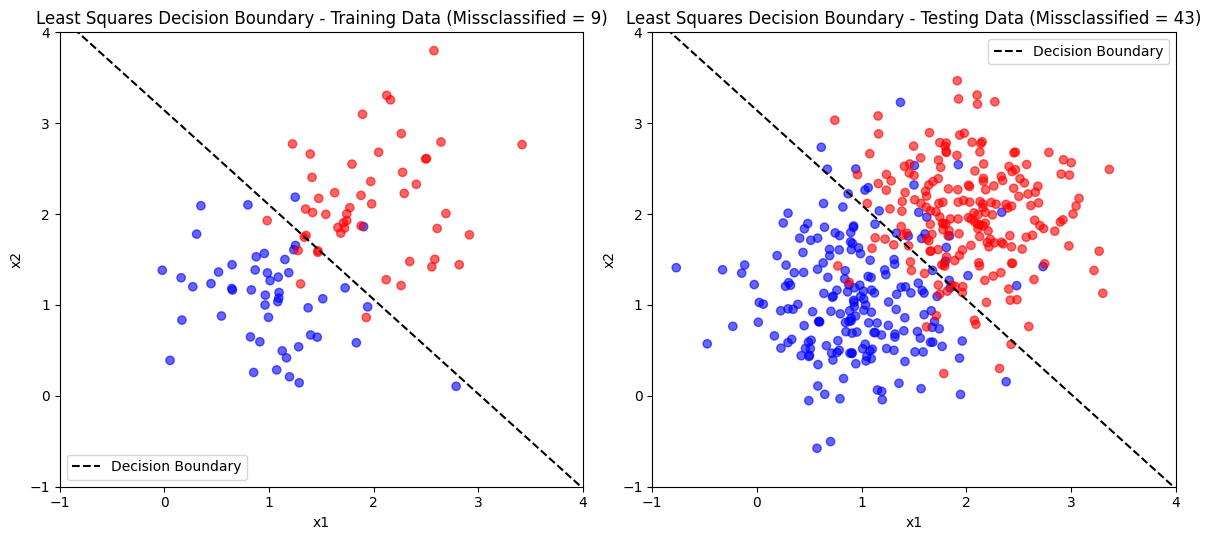

In [116]:
##########################################
#Plot the decision boundary using least squares
##########################################
def plot_least_squares(tr_data, tr_targets, te_data, te_targets):
    
    #Add the bias term 
    tr_data = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
    te_data = np.hstack((np.ones((te_data.shape[0], 1)), te_data))

    w = np.linalg.inv(tr_data.T @ tr_data) @ tr_data.T @ tr_targets

    tr_pred = np.array([+1 if (w.T @ x) >= 0 else -1 for x in tr_data])
    missclassifications_tr = sum(tr_pred != tr_targets)

    te_pred = np.array([+1 if (w.T @ x) >= 0 else -1 for x in te_data])
    missclassifications_te = sum(te_pred != te_targets)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))
    axs[0].scatter(tr_data[:, 1], tr_data[:, 2], c=tr_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
    axs[1].scatter(te_data[:, 1], te_data[:, 2], c=te_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

    #Plot the decision boundary 
    x_values = np.linspace(tr_data[:, 1].min()-40, tr_data[:, 1].max()+40, 2)
    y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2])
    axs[0].plot(x_values, y_values, 'k--', label='Decision Boundary')

    X_values = np.linspace(te_data[:, 1].min()-40, te_data[:, 1].max()+40, 2)
    Y_values = -(w[1] / w[2]) * X_values - (w[0] / w[2])
    axs[1].plot(X_values, Y_values, 'k--', label='Decision Boundary')

    axs[0].set_title(f'Least Squares Decision Boundary - Training Data (Missclassified = {missclassifications_tr})')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[0].set_xlim((-1,4))
    axs[0].set_ylim((-1,4))
    axs[0].legend()

    axs[1].set_title(f'Least Squares Decision Boundary - Testing Data (Missclassified = {missclassifications_te})')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].set_xlim((-1,4))
    axs[1].set_ylim((-1,4))
    axs[1].legend()

    plt.tight_layout()
    plt.show()    

acc = np.mean(te_pred == te_targets)
print('Accuracy with Least Squares:', acc*100)

plot_least_squares(tr_data, tr_targets, te_data, te_targets)


- The least squares method also gives similar accuracy for the given data set.


Accuracy(Testing) with Perceptron: 97.25
Accuracy(Testing) with Least Squares: 92.75


Text(0.5, 1.0, 'Perceptron vs Least Squares - Testing Data')

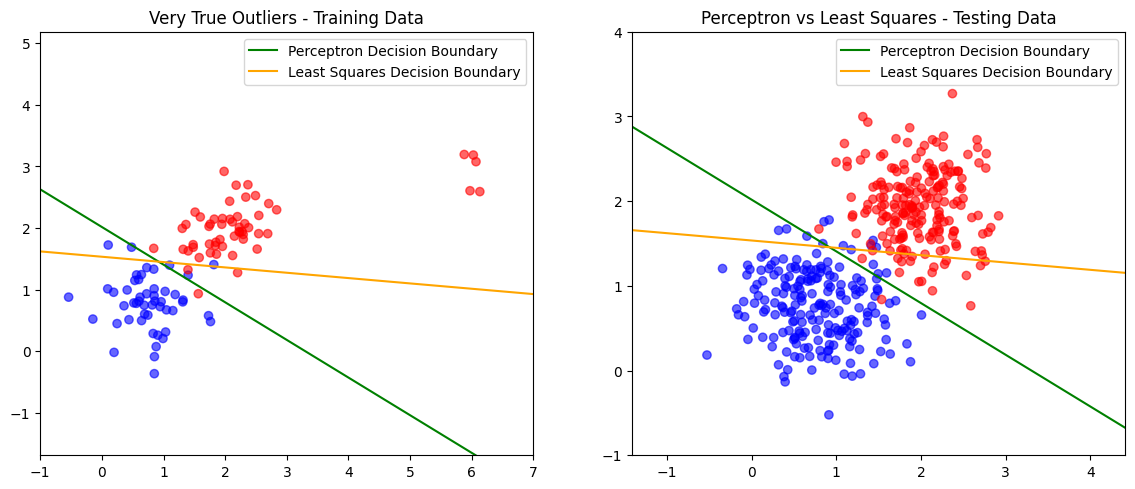

In [129]:
##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

#Set the parameters of class distribution
mean1 = [0.7,0.7]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.2,0],[0,0.2]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.ones(50),-np.ones(50)))           #Class labels. Assign the value "+1" to class1 and the value "-1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.ones(200),-np.ones(200)))            #Class labels. Assign the value "+1" to class1 and the value "-1" to class2.       

#Add the outliers to the training data (class 2)
mean = np.array([6,3])
cov = np.array([[0.05,0],[0,0.05]])
n = 5
class2_outliers = np.random.multivariate_normal(mean,cov, n)

#appending very true outliers to the training data
tr_data = np.vstack((tr_data, class2_outliers))
tr_targets = np.hstack((tr_targets, -np.ones(n)))

#Perceptron
pred_perceptron , w_perceptron = Perceptron(tr_data, tr_targets, te_data,False)
acc_perceptron = np.mean(te_targets == pred_perceptron)*100
print('Accuracy(Testing) with Perceptron:', acc_perceptron)

#Least Squares
X_train_bias = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
w_ls = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ tr_targets
X_test_bias = np.hstack((np.ones((te_data.shape[0], 1)), te_data))
pred_ls = X_test_bias @ w_ls
pred_ls = np.array([+1 if pred >= 0 else -1 for pred in pred_ls])
acc_ls = np.mean(te_targets == pred_ls)*100
print('Accuracy(Testing) with Least Squares:', acc_ls)

#Plotting both the decision boundaries
fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
axs[0].scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
axs[1].scatter(te_data[:, 0], te_data[:, 1], c=te_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

#Plotting Perceptron decision boundaries
x_values = np.array([-100,100])
y_values = -(w_perceptron[1] / w_perceptron[2]) * x_values - (w_perceptron[0] / w_perceptron[2])
axs[0].plot(x_values, y_values, label='Perceptron Decision Boundary', color='green')
axs[1].plot(x_values, y_values, label='Perceptron Decision Boundary', color='green')

#Plotting Least Squares decision boundaries
y_values = -(w_ls[1] / w_ls[2]) * x_values - (w_ls[0] / w_ls[2])
axs[0].plot(x_values, y_values, label='Least Squares Decision Boundary', color='orange')
axs[1].plot(x_values, y_values, label='Least Squares Decision Boundary', color='orange')

axs[0].axis('equal')    
axs[0].set_xlim((-1,7))
axs[0].set_ylim((-1,4.5))
#Setting equal axis

axs[1].axis('equal')
axs[1].set_xlim((-1,4))
axs[1].set_ylim((-1,4))

axs[0].legend()
axs[1].legend()
axs[0].set_title('Very True Outliers - Training Data')
axs[1].set_title('Perceptron vs Least Squares - Testing Data')




- **Perceptron Decision Boundary**: The green line represents the decision boundary derived by the perceptron algorithm on the training data. It is evident that the boundary successfully separates the majority of the blue and red data points, which represent the two different classes. However, there are outliers far from the main clusters (specifically the red points), and the perceptron has ignored these while optimizing its decision boundary, as it is a robust algorithm against outliers in the training phase.
- **Least Squares Decision Boundary**: The orange line represents the decision boundary obtained through the least squares method. This boundary appears to be influenced heavily by the outliers, particularly the red ones, which have caused the least squares boundary to be less optimal for separating the two classes. The least squares method, being sensitive to outliers, has its boundary shifted in an attempt to minimize the overall error, which includes the large errors introduced by the outliers.
- **Perceptron Accuracy**: With an accuracy of 97.25% on the testing data, the perceptron algorithm has demonstrated high effectiveness in classifying the data points.
- **Least Squares Accuracy**: An accuracy of 92.75% for the least squares method, while still relatively high, is noticeably lower than the perceptron's accuracy. This aligns with the observation that the least squares decision boundary is affected by the outliers present in the training data, leading to a less optimal generalization to the test data.


Accuracy on testing data by Perceptron on XOR dataset = 45.83333333333333


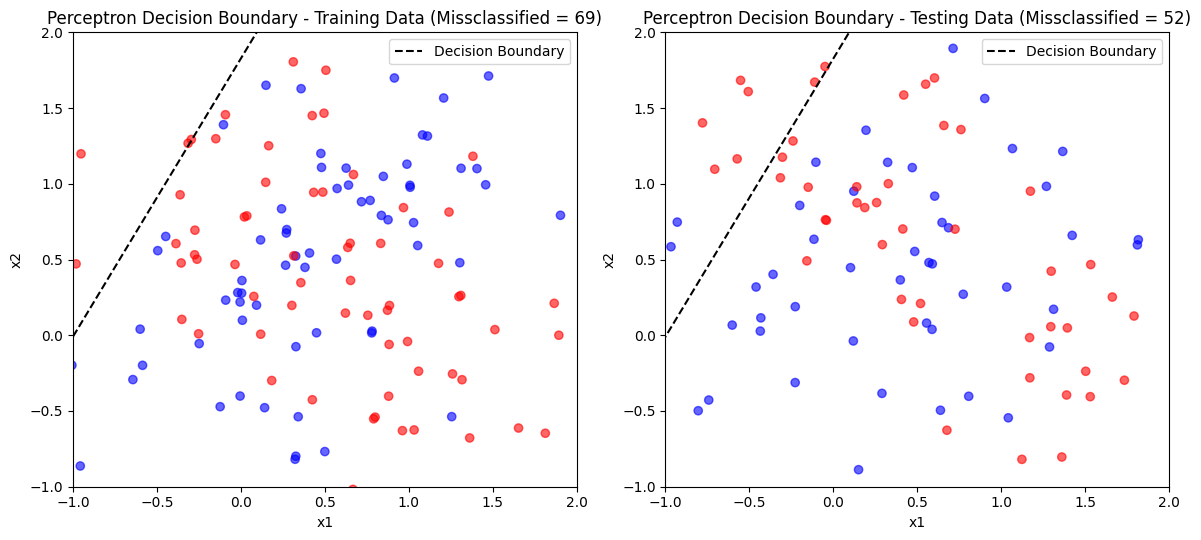

In [150]:
##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0,0]      #Mean of Gaussian1
class1_mean2 = [1,1]     #Mean of Gaussian3
class2_mean1 = [0,1]     #Mean of Gaussian2
class2_mean2 = [1,0]     #Mean of Gaussian4
cov = [[0.3,0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)            #Class1 data1
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)            #Class1 data2
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)            #Class2 data1
class2_data2 =  np.random.multivariate_normal(class2_mean2, cov, 60)            #Class2 data2

#Obtain 2-class dataset
class1 = np.vstack((class1_data1, class1_data2))
class2 = np.vstack((class2_data1, class2_data2))

points = np.vstack((class1, class2))
targets = np.hstack((np.ones(120), -np.ones(120))) #+1 for class1 and -1 for class2

#Shuffle points and targets together
permut = np.random.permutation(points.shape[0])
points = points[permut]
targets = targets[permut]

#Create train test splits (60 % train, 40 % test)
x_train = points[:int(0.6*points.shape[0])]
y_train = targets[:int(0.6*points.shape[0])]
x_test = points[int(0.6*points.shape[0]):]
y_test = targets[int(0.6*points.shape[0]):]

#Classify this dataset using perceptron algorithm
te_pred , w_perceptron = Perceptron(x_train, y_train, x_test,False)

#Plot the decision boundary
fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

# Plot for training data
axs[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

# Plot the decision boundary for training data
x_values_tr = np.array([-100,100])
y_values_tr = -(w_perceptron[1] / w_perceptron[2]) * x_values_tr - (w_perceptron[0] / w_perceptron[2])
axs[0].plot(x_values_tr, y_values_tr, 'k--', label='Decision Boundary')

tr_pred = np.array([+1 if (w[0] + w[1] * x[0] + w[2] * x[1]) >= 0 else -1 for x in x_train])

# Calculate misclassifications for training data
missclassifications_tr = sum(tr_pred != y_train)

axs[0].set_title(f'Perceptron Decision Boundary - Training Data (Missclassified = {missclassifications_tr})')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_xlim((-1,2))
axs[0].set_ylim((-1,2))
axs[0].legend()

# Plot for testing data 
axs[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
x_values_te = np.array([-100,100])
y_values_te = -(w_perceptron[1] / w_perceptron[2]) * x_values_te - (w_perceptron[0] / w_perceptron[2])
axs[1].plot(x_values_te, y_values_te, 'k--', label='Decision Boundary')

missclassifications_te = sum(te_pred != y_test)
acc = np.mean(te_pred == y_test)*100
print(f'Accuracy on testing data by Perceptron on XOR dataset = {acc}')

axs[1].set_title(f'Perceptron Decision Boundary - Testing Data (Missclassified = {missclassifications_te})')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_xlim((-1,2))
axs[1].set_ylim((-1,2))
axs[1].legend()

plt.tight_layout()
plt.show()

- As we can see, the perceptron algorithm fails terribly to classify the xor data set as it is not linearly seperable. It's accuracy is less than 50% which suggest that the algorithm is not performing well.


<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.** 0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$

1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
4. Plot the decision boundaries for all the three cases in three different subplots.

**b). Class distributions have different covariance matrices: Non-linear decision boundary.** 0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$

1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
4. Plot the decision boundaries for all the three cases in three different subplots.

**c). Report your observations**


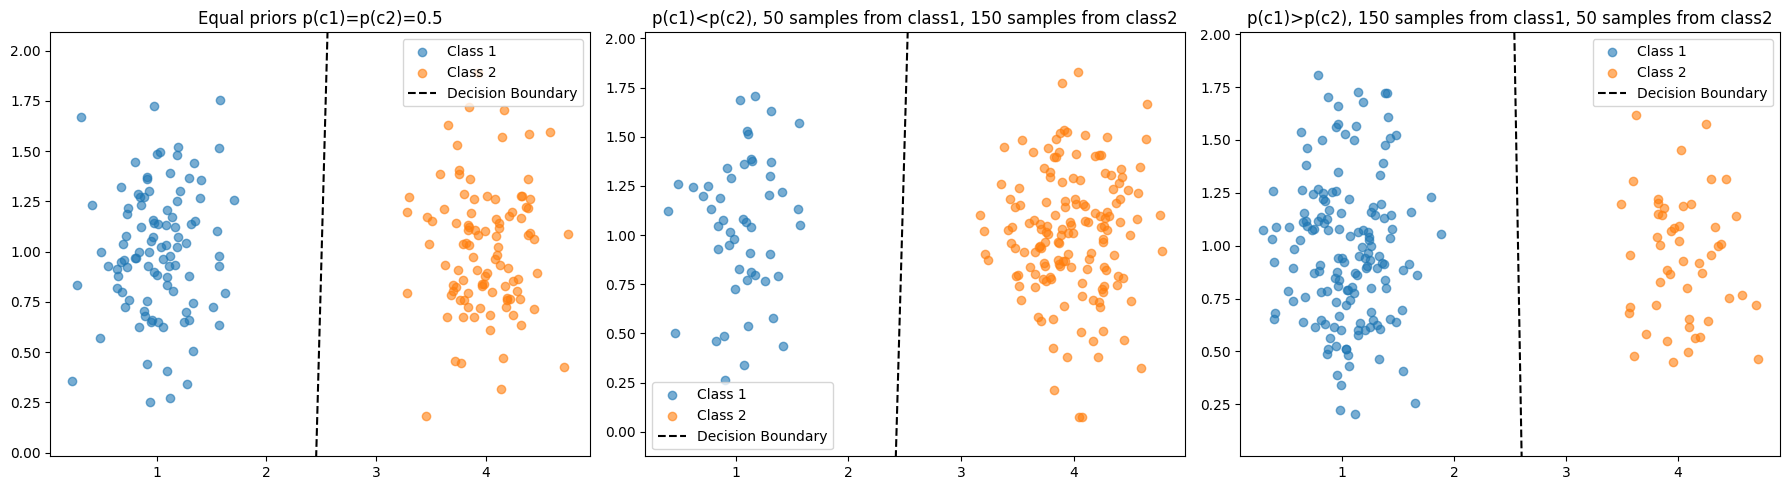

In [132]:
##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = np.array([1, 1])
m2 = np.array([4, 1])
cov = np.array([[0.1, 0.0], [0.0, 0.1]])

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case1 = np.random.multivariate_normal(m1, cov, 100)
samples_c2_case1 = np.random.multivariate_normal(m2, cov, 100)
X_train_case1 = np.vstack((samples_c1_case1, samples_c2_case1))
Y_train_case1 = np.hstack((np.zeros(100), np.ones(100)))

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case2 = np.random.multivariate_normal(m1, cov, 50)
samples_c2_case2 = np.random.multivariate_normal(m2, cov, 150)
X_train_case2 = np.vstack((samples_c1_case2, samples_c2_case2))
Y_train_case2 = np.hstack((np.zeros(50), np.ones(150)))

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case3 = np.random.multivariate_normal(m1, cov, 150)
samples_c2_case3 = np.random.multivariate_normal(m2, cov, 50)
X_train_case3 = np.vstack((samples_c1_case3, samples_c2_case3))
Y_train_case3 = np.hstack((np.zeros(150), np.ones(50)))

##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    
    #Class 1 points 
    c1_pts = X_train[Y_train == 0]
    n1 = len(c1_pts)

    #Class 2 points
    c2_pts = X_train[Y_train == 1]
    n2 = len(c2_pts)

    p_c1 = n1/(n1+n2)
    p_c2 = 1. - p_c1

    mean_1 = np.sum(c1_pts, axis=0) / n1  #Summing the colums , mu1 = Sum(Xn)/n1 , where xn belongs to class 1
    mean_2 = np.sum(c2_pts, axis=0) / n2  #Summing the colums , mu2 = Sum(Xn)/n2 , where xn belongs to class 2

    cov1 = np.dot((c1_pts - mean_1).T, (c1_pts - mean_1)) / n1  # Sigma_1 = (1/N1) * sum((x_n - mu_1) * (x_n - mu_1).T for x_n in C1)
    cov2 = np.dot((c2_pts - mean_2).T, (c2_pts - mean_2)) / n2  # Sigma_2 = (1/N2) * sum((x_n - mu_2) * (x_n - mu_2).T for x_n in C2)

    cov = p_c1 * cov1 + p_c2 * cov2
    # mean_1 = m1
    # mean_2 = m2
    # cov = np.array([[0.1, 0.0], [0.0, 0.1]])
    
    sigma_inv = np.linalg.inv(cov)
    w =  sigma_inv @ (mean_1 - mean_2)
    w0 = -0.5 * (mean_1 @ sigma_inv @ mean_1 - mean_2 @ sigma_inv @ mean_2) + np.log(p_c1 / p_c2)

    return np.array([w0]+list(w))

#Plot the decision regions
def plot_decision_boundary(ax, w, samples_c1, samples_c2, title):
    # Generate a grid of points to calculate the decision boundary
    x_min, x_max = min(samples_c1[:,0].min(), samples_c2[:,0].min()), max(samples_c1[:,0].max(), samples_c2[:,0].max())
    y_min, y_max = min(samples_c1[:,1].min(), samples_c2[:,1].min()), max(samples_c1[:,1].max(), samples_c2[:,1].max())

    ax.scatter(samples_c1[:, 0], samples_c1[:, 1], label='Class 1', alpha=0.6)
    ax.scatter(samples_c2[:, 0], samples_c2[:, 1], label='Class 2', alpha=0.6)

    #Plotting decsion boundary 
    # At decision boundary : w0 + w1*x1 + w2*x2 = 0 , x2 = -(w1/w2)x1 - (w0/w2)
    x_values = np.array([x_min-100,x_max+100])
    if(w[2] != 0): 
        y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2])
        ax.plot(x_values, y_values, 'k--', label='Decision Boundary')
    else :
        x_values = np.array([-w[0]/w[1],-w[0]/w[1]])
        y_values = np.array([y_min-100,y_max+100])
        ax.plot(x_values, y_values, 'k--', label='Decision Boundary')
    

    ax.set_xlim([x_min-0.2, x_max+0.2])
    ax.set_ylim([y_min-0.2, y_max+0.2])
    ax.set_title(title)
    ax.legend()

# Case 1: Equal class priors (100 samples from each class)
w_case1 = decisionBoundary(X_train_case1, Y_train_case1)

# Case 2: p(c1) < p(c2) (50 samples from class1 and 150 samples from class2)
w_case2 = decisionBoundary(X_train_case2, Y_train_case2)

# Case 3: p(c1) > p(c2) (150 samples from class1 and 50 samples from class2)
w_case3 = decisionBoundary(X_train_case3, Y_train_case3)

# Plotting all three cases
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot for case 1
plot_decision_boundary(ax[0], w_case1, samples_c1_case1, samples_c2_case1,
                       "Equal priors p(c1)=p(c2)=0.5")

# Plot for case 2
plot_decision_boundary(ax[1], w_case2, samples_c1_case2, samples_c2_case2,
                       "p(c1)<p(c2), 50 samples from class1, 150 samples from class2")

# Plot for case 3
plot_decision_boundary(ax[2], w_case3, samples_c1_case3, samples_c2_case3,
                       "p(c1)>p(c2), 150 samples from class1, 50 samples from class2")

plt.tight_layout()
plt.show()

Observations <br><br>
Due to shared covariances, from all three plot we can see that the decision boundary is linear.

- **Equal priors p(c1)=p(c2)=0.5**: The decision boundary is a straight line equally distant from both class means. This suggests that the classifier gives equal weight to both classes when deciding the class of a new sample.
- **p(c1)<p(c2)** with fewer samples from class 1 and more from class 2: The decision boundary shifts towards class 1, indicating that class 2 is given more weight due to its higher prior probability or more samples, leading to a higher likelihood of a new sample being classified as class 2.
- **p(c1)>p(c2)** with more samples from class 1 and fewer from class 2: Conversely, the decision boundary shifts towards class 2. This shows that class 1 is now weighted more heavily, possibly due to its higher prior or more substantial sample size, thus favoring class 1 in classification decisions.


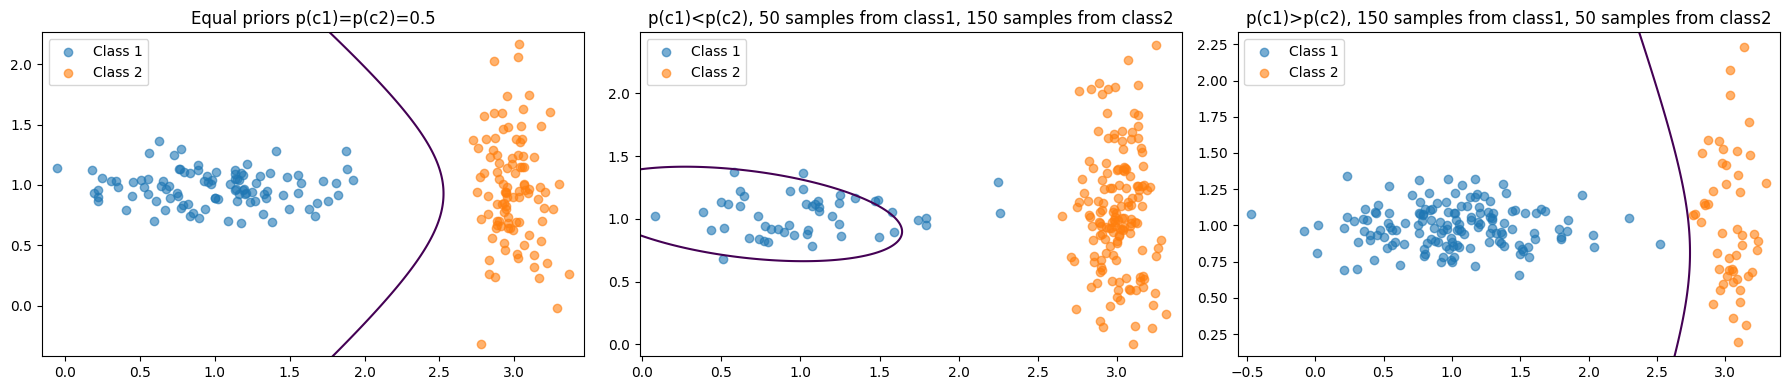

In [134]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = np.array([1, 1])
m2 = np.array([3, 1])
cov1 = np.array([[0.2, 0.0], [0.0, 0.02]])
cov2 = np.array([[0.02, 0.0], [0.0, 0.2]])

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case1 = np.random.multivariate_normal(m1, cov1, 100)
samples_c2_case1 = np.random.multivariate_normal(m2, cov2, 100)
X_train_case1 = np.vstack((samples_c1_case1, samples_c2_case1))
Y_train_case1 = np.hstack((np.zeros(100), np.ones(100)))

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case2 = np.random.multivariate_normal(m1, cov1, 50)
samples_c2_case2 = np.random.multivariate_normal(m2, cov2, 150)
X_train_case2 = np.vstack((samples_c1_case1, samples_c2_case1))
Y_train_case2 = np.hstack((np.zeros(50), np.ones(150)))

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
samples_c1_case3 = np.random.multivariate_normal(m1, cov1, 150)
samples_c2_case3 = np.random.multivariate_normal(m2, cov2, 50)
X_train_case3 = np.vstack((samples_c1_case1, samples_c2_case1))
Y_train_case3 = np.hstack((np.zeros(150), np.ones(50)))

##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train, X_test):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w

    #Class 1 points 
    c1_pts = X_train[Y_train == 0]
    n1 = len(c1_pts)

    #Class 2 points
    c2_pts = X_train[Y_train == 1]
    n2 = len(c2_pts)

    p_c1 = n1/(n1+n2)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(c1_pts, axis=0)
    mean_2 = np.mean(c2_pts, axis=0)

    cov1 = np.dot((c1_pts - mean_1).T, (c1_pts - mean_1)) / n1  # Sigma_1 = (1/N1) * sum((x_n - mu_1) * (x_n - mu_1).T for x_n in C1)
    cov2 = np.dot((c2_pts - mean_2).T, (c2_pts - mean_2)) / n2  # Sigma_2 = (1/N2) * sum((x_n - mu_2) * (x_n - mu_2).T for x_n in C2)

    #For different covariance matrix, decision boundary is given by 
    # (x.T@w2@x) + w1.T@x + w0 = 0 (Quadratic decision boundary)

    simga1_inv = np.linalg.inv(cov1)
    simga2_inv = np.linalg.inv(cov2)

    w2 = 0.5*(simga1_inv - simga2_inv)    # w2 = 1/2 (Sigma_1^-1 + Sigma_2^-1)   #(2 by 2 matrix)
    w1 = simga2_inv@mean_2 - simga1_inv@mean_1 # w1 = Sigma_2^-1 @ mu_2 - Sigma_1^-1 @ mu_1   #(2 by 1 vector)
    w0 = 0.5*(mean_1.T@simga1_inv@mean_1 - mean_2.T@simga2_inv@mean_2) + np.log(p_c1/p_c2) # w0 = 1/2 (mu_1.T @ Sigma_1^-1 @ mu_1 - mu_2.T @ Sigma_2^-1 @ mu_2) + log(p_c1/p_c2)  #scalar

    w = [w0, w1, w2]
    
    #Compute predictions on test data    
    predictions = []
    for x in X_test:
        #Quadratic decision boundary
        decision = x.T@w2@x + w1.T@x + w0
        if decision >= 0:
            predictions.append(0)
        else:
            predictions.append(1)


    return predictions , w

#Plot the decision regions
def plot_decision_boundary(ax, w, samples_c1, samples_c2, title):
    # Generate a grid of points to calculate the decision boundary
    x_min, x_max = min(samples_c1[:,0].min(), samples_c2[:,0].min()), max(samples_c1[:,0].max(), samples_c2[:,0].max())
    y_min, y_max = min(samples_c1[:,1].min(), samples_c2[:,1].min()), max(samples_c1[:,1].max(), samples_c2[:,1].max())

    ax.scatter(samples_c1[:, 0], samples_c1[:, 1], label='Class 1', alpha=0.6)
    ax.scatter(samples_c2[:, 0], samples_c2[:, 1], label='Class 2', alpha=0.6)

    #Plotting decsion boundary (For non shared covariace matrix)
    #At decision boundary : x.T@w2@x + w1.T@x + w0 = z , where z = 0
    # We will generate x = (x1,x2) points and generate z, and plot the points where z = 0 

    # Generate a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min-1, x_max-0.1, 500), np.linspace(y_min-1, y_max+1, 500))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    zz = [x.T@w[2]@x + w[1].T@x + w[0] for x in mesh]
    
    zz = np.array(zz).reshape(xx.shape)

    ax.contour(xx, yy, zz, 'k--',levels=[0])  #Plotting the decision boundary (contours where z is 0)
    ax.set_xlim([x_min-0.1, x_max+0.1])
    ax.set_ylim([y_min-0.1, y_max+0.1])
    ax.set_title(title)
    ax.legend()

# Case 1: Equal class priors (100 samples from each class)
pred,w_case1 = decisionBoundary(X_train_case1, Y_train_case1, X_train_case1)

# Case 2: p(c1) < p(c2) (50 samples from class1 and 150 samples from class2)
pred,w_case2 = decisionBoundary(X_train_case2, Y_train_case2, X_train_case2)

# Case 3: p(c1) > p(c2) (150 samples from class1 and 50 samples from class2)
pred,w_case3 = decisionBoundary(X_train_case3, Y_train_case3, X_train_case3)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Plot for case 1
plot_decision_boundary(ax[0], w_case1, samples_c1_case1, samples_c2_case1,
                       "Equal priors p(c1)=p(c2)=0.5")

# Plot for case 2
plot_decision_boundary(ax[1], w_case2, samples_c1_case2, samples_c2_case2,
                       "p(c1)<p(c2), 50 samples from class1, 150 samples from class2")

# Plot for case 3
plot_decision_boundary(ax[2], w_case3, samples_c1_case3, samples_c2_case3,
                       "p(c1)>p(c2), 150 samples from class1, 50 samples from class2")

plt.tight_layout()

Observations <br><br>

As we can see for classes with different covariance matrix, the decision boundary is non-linear (Quadratic for D=2).

- **Equal priors**: The non-linear decision boundary (curved line) is shaped in such a way to accommodate the different spreads (variances) of the two classes. The boundary is closer to the class with the smaller spread, as the high density of points in that class would contribute to a higher posterior probability in that region.
- **p(c1)<p(c2)** with fewer samples from class 1 and more from class 2: The decision boundary encapsulates the class with fewer samples (class 1) and curves around the class with more samples (class 2), which has a higher variance in one dimension. This indicates a compromise between the differing variances and the different sample sizes/prior probabilities.
- **p(c1)>p(c2)** with more samples from class 1 and fewer from class 2: The boundary shows a similar behavior as the previous, but it's clear that the decision boundary is more influenced by the class with more samples (class 1), as it pushes into the space of class 2, which has a higher variance along one axis.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.

f). Report your observations


Accuracy with Logistic Regression: 88.25 



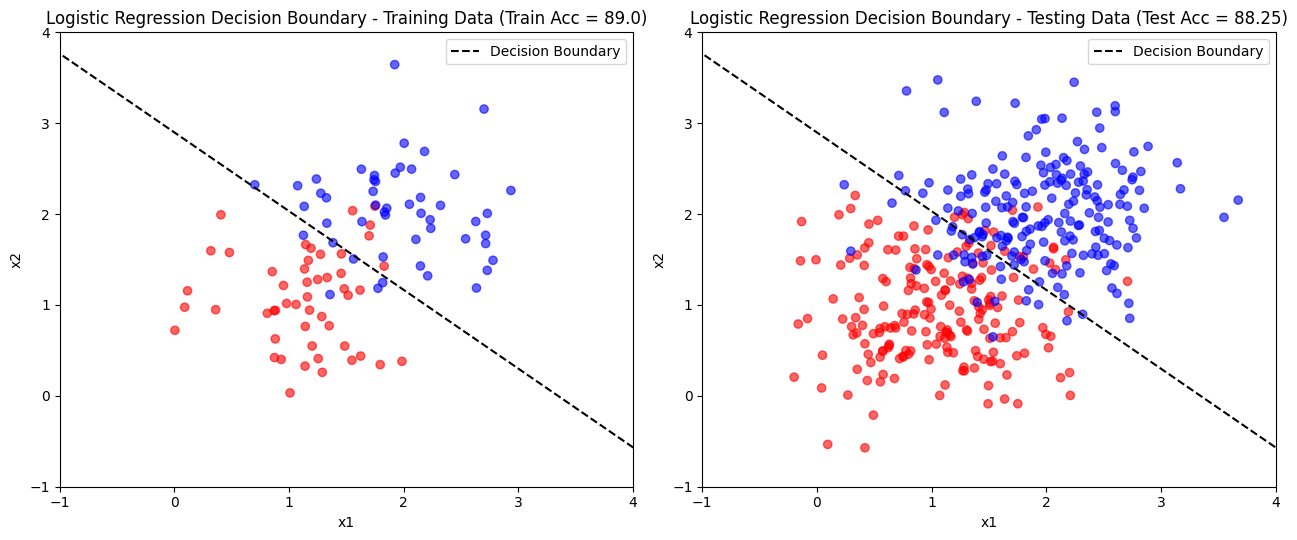

In [135]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200),np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.       


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def sigmoid(x):
  # x = np.clip(x, -500, 500)  # Clip values to avoid overflow
  return 1/(1+np.exp(-x))

def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter =  1000 #max number of ierations for parameter update
  threshold = 0.5  #threshold for classification
  tol = 0.0001 #tolerance for convergence
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))         #Data. Append ones to the training data to take care of the bias
  w = np.random.randn(X.shape[1])        #Initialize the weight vector
  t = Y_train  #Training targets
  lambda_reg=1e-2 #Adding a regularization to prevent singular matrix
  for iter in range(0,max_iter,1):
    y = sigmoid(X@w)   #Predictions on X. Sigmoid(w^T.x)
    error = y - t      #Difference between preds and Y_train
    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    Grad = X.T@(y-t)  #Gradient of the loss function
    R = np.diag(y*(1-y))  # R diagonal matrix with Rnn = yn*(1-yn)
    H = X.T@R@X + lambda_reg*np.identity(X.shape[1])  #Hessian matrix with regularization
    # z = (X@w) - np.linalg.inv(R)@(y-t)

    #Update the weight vector (Using IWLS - Iterative Weighted Least Squares)
    w = w - (np.linalg.inv(H)@Grad)
    # w = np.linalg.inv((X.T)@R@X) @ (X.T@R@z)

  #Test data predictions
  #Append ones to testing data
  X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds = sigmoid(X_test@w)

  #Compare the predictions with 0, to output the decision
  test_preds = [1 if i >= threshold else 0 for i in test_preds]

  #Return the predicted test labels
  return np.array(test_preds),w


###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  acc = np.mean(Y_pred == te_targets)*100
  #Compute and return the accuracy
  return acc


te_pred ,w = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, te_pred)
print('Accuracy with Logistic Regression:', acc, '\n')

##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
def plot_decision_boundary_logistic(tr_data, tr_targets, te_data,te_targets, w):
    
    #adding the bias term 
    tr_data = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
    te_data = np.hstack((np.ones((te_data.shape[0], 1)), te_data))
        
    # Plot the dataset
    fig, axs = plt.subplots(1, 2, figsize=(13, 5.5))
    axs[0].scatter(tr_data[:, 1], tr_data[:, 2], c=tr_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
    axs[1].scatter(te_data[:, 1], te_data[:, 2], c=te_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

    #Plot the decision boundary 
    x_values = np.linspace(tr_data[:, 1].min()-40, tr_data[:, 1].max()+40, 2)
    y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2])
    axs[0].plot(x_values, y_values, 'k--', label='Decision Boundary')

    X_values = np.linspace(te_data[:, 1].min()-40, te_data[:, 1].max()+40, 2)
    Y_values = -(w[1] / w[2]) * X_values - (w[0] / w[2])
    axs[1].plot(X_values, Y_values, 'k--', label='Decision Boundary')

    tr_pred = [1 if i >= 0.5 else 0 for i in (sigmoid(tr_data@w))]
    te_pred = [1 if i >= 0.5 else 0 for i in (sigmoid(te_data@w))]

    axs[0].set_title(f'Logistic Regression Decision Boundary - Training Data (Train Acc = {np.mean(tr_targets == tr_pred)*100})')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[0].set_xlim((-1,4))
    axs[0].set_ylim((-1,4))
    axs[0].legend()

    axs[1].set_title(f'Logistic Regression Decision Boundary - Testing Data (Test Acc = {np.mean(te_targets == te_pred)*100})')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].set_xlim((-1,4))
    axs[1].set_ylim((-1,4))
    axs[1].legend()

    plt.tight_layout()
    plt.show() 

plot_decision_boundary_logistic(tr_data, tr_targets, te_data,te_targets, w)


Accuracy(Testing) with Logistic Regression: 98.25
Accuracy(Testing) with Least Squares: 93.0


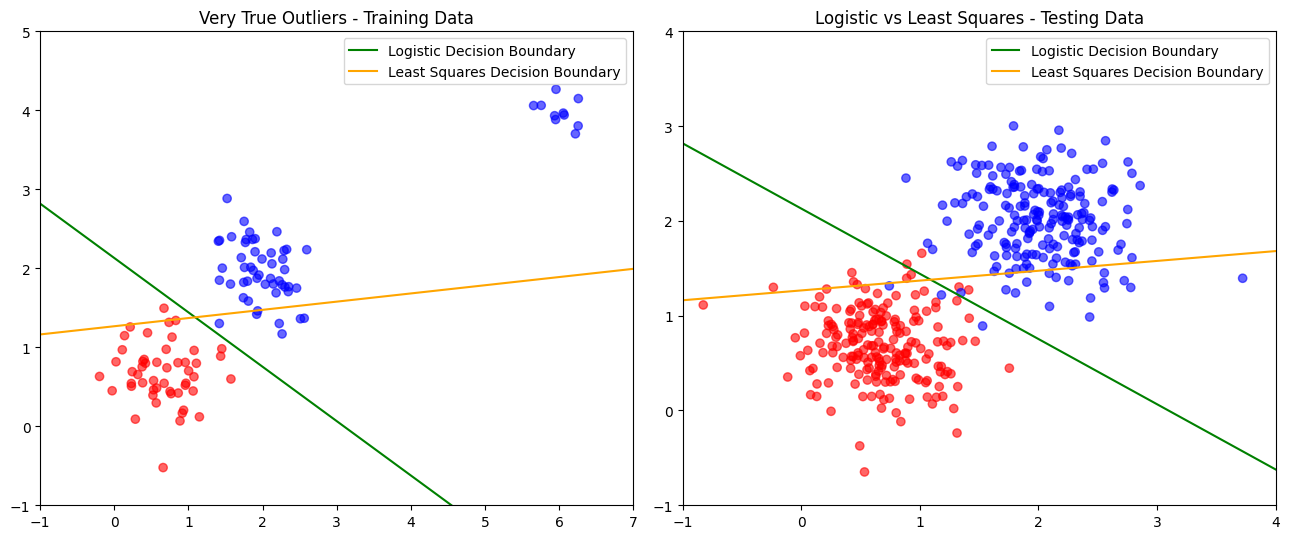

In [139]:
##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################

#Set the parameters of class distribution
mean1 = [0.7,0.7]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.15,0],[0,0.15]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                         #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "+1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200),np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "+1" to class2.       

#Add the outliers to the training data (class 2)
mean = np.array([6,4])
cov = np.array([[0.05,0],[0,0.05]])
n = 10
class2_outliers = np.random.multivariate_normal(mean,cov, n)

#appending very true outliers to the training data
tr_data = np.vstack((tr_data, class2_outliers))
tr_targets = np.hstack((tr_targets, np.ones(n)))

#PLOTTING

#Plotting scatter plots
fig, axs = plt.subplots(1, 2, figsize=(13, 5.5))
axs[0].scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
axs[1].scatter(te_data[:, 0], te_data[:, 1], c=te_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

#Logistic Regression
te_pred ,w_logistic = Logistic_Regression(tr_data, tr_targets, te_data)
acc_logistic = LR_Accuracy(te_targets, te_pred)
print('Accuracy(Testing) with Logistic Regression:', acc_logistic)

#Plotting Logistic decision boundaries
# p[c1] = p[c2] = 0.5 = sigmoid(w0 + w1x1 + w2x2)
# 1/(1+e^-k) = 0.5 for k=0=w0 + w1x1 + w2x2
# x2 = -(w1/w2)x1 - (w0/w2) 
x_values = np.array([-100,100])
y_values = -(w_logistic[1] / w_logistic[2]) * x_values - (w_logistic[0] / w_logistic[2])
axs[0].plot(x_values, y_values, label='Logistic Decision Boundary', color='green')
axs[1].plot(x_values, y_values, label='Logistic Decision Boundary', color='green')

#Least Squares Formulation
X_train_bias = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
w_least_square = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ tr_targets

X_test_bias = np.hstack((np.ones((te_data.shape[0], 1)), te_data))
te_pred_ls = np.array([+1 if (w_least_square.T @ x) >= 0.5 else 0 for x in X_test_bias])
acc_least_squares = np.mean(te_targets == te_pred_ls)*100
print('Accuracy(Testing) with Least Squares:', acc_least_squares)

#Plotting Least Squares decision boundaries
# y(w.Tx=threshold), w0 + w1*x1 + w2*x2 = threshold , x2 = -(w1/w2)x1 - (w0/w2) + threshold/w2
# Here threshold = 0.5
y_values = -(w_least_square[1] / w_least_square[2]) * x_values - (w_least_square[0] / w_least_square[2]) + 0.5/w_least_square[2]
axs[0].plot(x_values, y_values, label='Least Squares Decision Boundary', color='orange')
axs[1].plot(x_values, y_values, label='Least Squares Decision Boundary', color='orange')

axs[0].set_xlim((-1,7))
axs[0].set_ylim((-1,5))

axs[1].set_xlim((-1,4))
axs[1].set_ylim((-1,4))

axs[0].legend()
axs[1].legend()
axs[0].set_title('Very True Outliers - Training Data')
axs[1].set_title('Logistic vs Least Squares - Testing Data')
plt.tight_layout()


Observations:

- **Training Data**: In the left plot, we can see that logistic regression provides a decision boundary that is less affected by outliers compared to the least squares decision boundary. The logistic regression boundary appears more robust, placing the division between classes where we would intuitively expect it, given the main clusters of the data.
- **Testing Data**: In the right plot, the logistic regression decision boundary again demonstrates greater robustness to outliers, dividing the two main clusters effectively. The least squares decision boundary is visibly skewed by the outliers, resulting in a less optimal separation of the two classes.

* **Logistic Regression**: With an accuracy of 98.25% on the testing data, logistic regression shows high effectiveness in classifying the data points.
* **Least Squares Classification**: An accuracy of 93.0% is still relatively high but significantly lower than that of logistic regression. This suggests that the least squares approach, which likely minimizes the squared error without accounting for the probabilistic nature of the classes, is more sensitive to the influence of outliers, causing some misclassifications.


<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>

<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>

<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>

<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


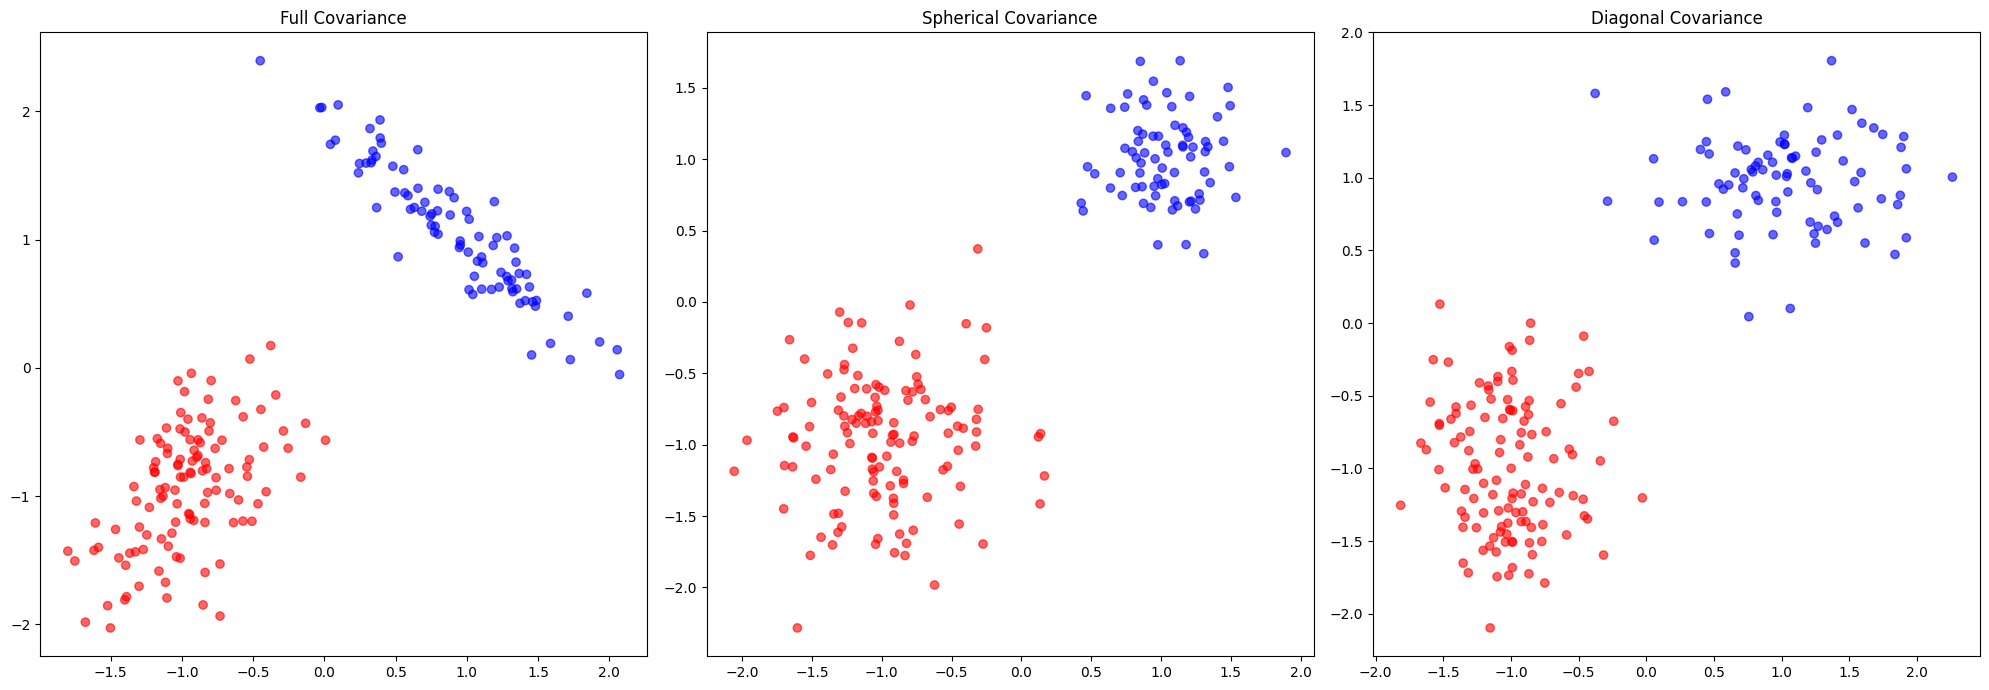

In [140]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    data = []
    labels = []
    for i in range(N):
        
        # Select the Gaussian component based on pi
        k = np.random.choice(len(pi), p=pi)

        # Sample from the selected Gaussian
        sample = np.random.multivariate_normal(mu[k], sigma[k])
        data.append(sample)
        labels.append(k)

    return np.asarray(data), np.asarray(labels)
    ############################################################################

############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1,-1])   #Mean vector of component1 in GMM
sig1 = np.array([[0.15,0.1],[0.1,0.25]])   #Full covariance matrix of component1 in GMM
mu2 = np.array([1,1])   #Mean vector of component2 in GMM
sig2 = np.array([[0.3,-0.25],[-0.25,0.25]])  #Full covariance matrix of component2 in GMM
# sig2 = sig1
pi = np.array([0.6,0.4])    #Prior probabilities

n_points = 200 #Number of points

# Spherical covariances
sig1_s = np.array([[0.2,0],[0,0.2]])    
sig2_s = np.array([[0.1,0],[0,0.1]])   
# Diagonal covariances
sig1_d = np.array([[0.1,0],[0,0.2]])    
sig2_d = np.array([[0.2,0],[0,0.1]])   

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))
# print(labels_full.shape,data_full.shape)
# Full Covariance
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
ax[0].set_title('Full Covariance')

# Spherical Covariance
ax[1].scatter(data_sp[:, 0], data_sp[:, 1],c=labels_sp, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
ax[1].set_title('Spherical Covariance')

# Diagonal Covariance
ax[2].scatter(data_dg[:, 0], data_dg[:, 1],c=labels_dg, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
ax[2].set_title('Diagonal Covariance')

plt.tight_layout()
plt.show()


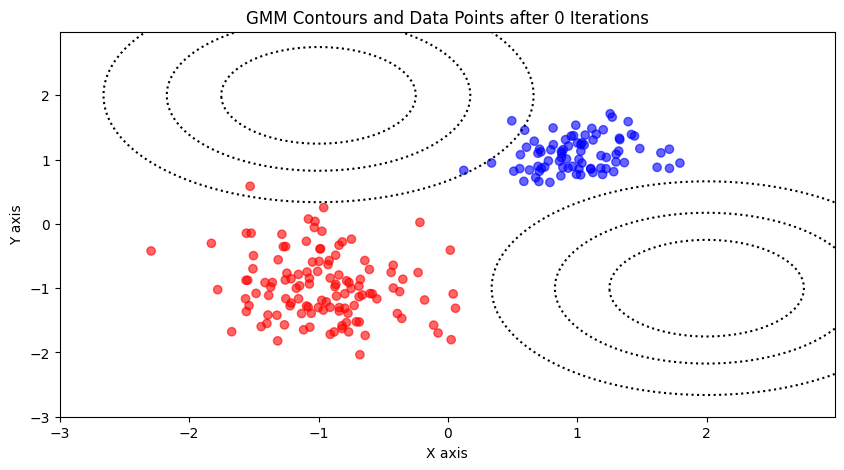

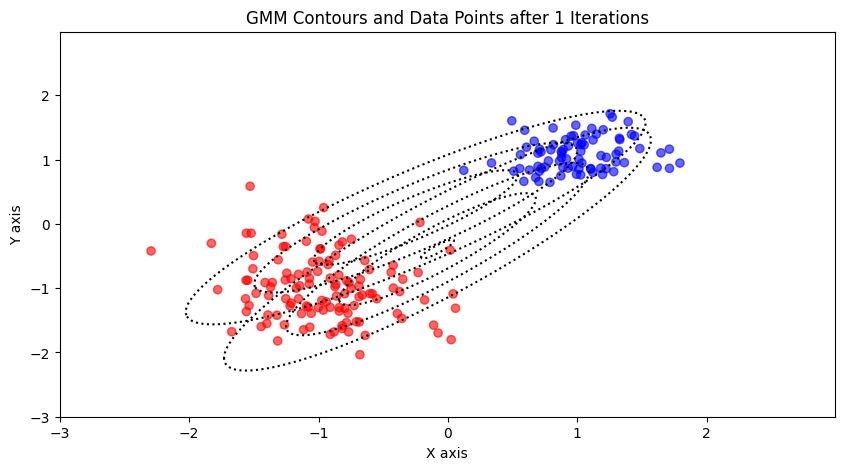

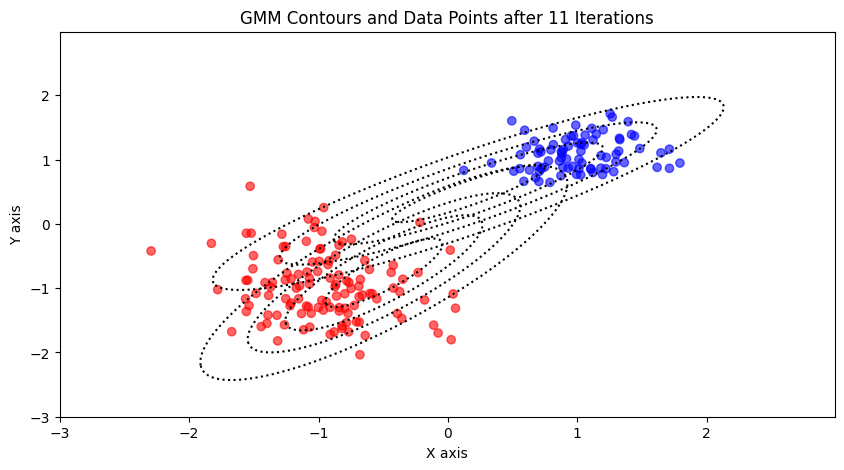

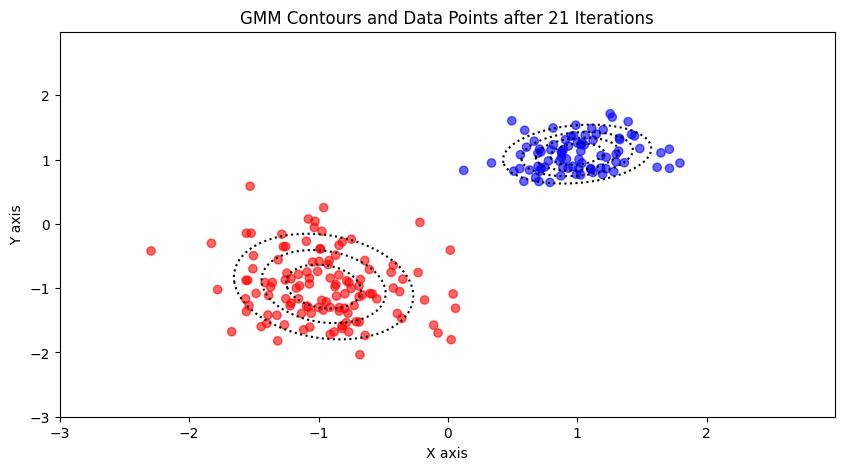

Converged after 21 iterations for tol = 0.001


20

In [142]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood

  N, D = data.shape   # N opservations, D dimensions
  M = len(pi)         # Number of components (M) in GMM 

  log_likelihood = 0
  for n in range(N):
    temp = 0
    for m in range(M):
      temp += pi[m] * multivariate_normal(mu[m], sigma[m]).pdf(data[n])
    log_likelihood += np.log(temp)

  return log_likelihood

############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  N, D = data.shape
  M = len(pi)
  gamma = np.zeros((N,M))
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      numerator = pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(data[n])
      denominator = np.sum([pi[m] * multivariate_normal(mu[m], sigma[m]).pdf(data[n]) for m in range(len(pi))])
      gamma[n,k] = numerator/denominator

  return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model

  N, D = data.shape
  M = gamma.shape[1]  # Number of components in GMM, gamma is NxM

  #Update mu
  mu = np.zeros((M,D))
  Nk = np.sum(gamma, axis=0)  # Nk = sum(n=1 to N) gamma(n,k)  -> Here, Nk is a vector for all ks 
  for k in range(M):
    for n in range(N):
      mu[k] += gamma[n,k] * data[n]
    mu[k] /= Nk[k]
  
  #Update sigma
  sigma = [np.zeros((D, D)) for i in range(M)]
  for k in range(M):
    for n in range(N):
      xn_mu = np.reshape((data[n]-mu[k]),(-1,1))
      sigma[k] += gamma[n,k] * xn_mu@xn_mu.T
    sigma[k] /= Nk[k]
    sigma[k] += np.eye(D) * 1e-6 #To avoid singular matrix and ensure positve definiteness

  #Update pi
  pi = Nk/N

  #Return the parameters of GMM model
  return pi, mu, sigma

#Complete the below function. It plots the contours
def plot_contours(data,labels, pi, mu, sigma,iter):
    plt.figure(figsize=(10, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    for i in range(M):
        plt.contour(x, y, multivariate_normal(mu[i], sigma[i]).pdf(pos), levels=4, colors='black', linestyles='dotted', zorder=1)
    plt.title('GMM Contours and Data Points after {} Iterations'.format(iter))
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
N = 200       #number of input examples
data,labels = generateData([0.6,0.4],[mu1 ,mu2], [sig1_s, sig2_s], N)    #data to run EM-algorithm ,  #labels  
D = 2       #data dimension
M = 2       #no.of components in GMM

pi =  np.array([0.5, 0.5])     #Initialize the prior probabilities
mu = np.array([[-1,2],[2,-1]])     #Initialize the mean vectors
sigma = [np.eye(D), np.eye(D)]  #Initialize the covariance matrices

nsteps = 100  #Number of steps to run EM algorithm
tol = 1e-3    #Tolerance for log-likelihood convergence

def Illustration_of_EM_algo(data,labels,pi,mu,sigma,nsteps,tol,printing):

  if(printing):
    #Plot the contours
    plot_contours(data, labels, pi, mu, sigma,0)

  for iter in range(0,nsteps,1):

    #Compute the  log likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

    #Expectation step
    gamma = expectation(data, pi, mu, sigma)

    #Maximization step
    pi_new, mu_new, sigma_new = maximization(data, gamma)

    #Check for convergence
    if(np.abs(ll - likelihood(data, pi_new, mu_new, sigma_new, log_likelihood=True)) < tol):
      plot_contours(data, labels, pi, mu, sigma,iter+1)
      print(f'Converged after {iter+1} iterations for tol = {tol}')
      break

    #Update the parameters
    pi = pi_new
    mu = mu_new
    sigma = sigma_new

    if(iter%10 == 0 and printing):
      plot_contours(data, labels, pi, mu, sigma,iter+1)
  
  return iter

Illustration_of_EM_algo(data,labels,pi,mu,sigma,nsteps,tol,printing=True) 

Observations

- **Initial Setup (0 iterations)**: The initial contours (guess) of the GMM do not accurately represent the underlying data distribution. They are spaced far apart, and each contour circle seems to equally cover both red and blue data points, indicating that the initial parameter guesses are not aligned with the data.
- **Intermediate Iterations (1, 11)**: With each set of iterations, the GMM contours become more elongated and oriented according to the distribution of the data points. This progression shows that the EM algorithm is effectively moving the model parameters towards those that better capture the data structure.
- **Final State (21 iterations)**: By the last iteration, the contours have settled into a configuration that seems to capture the underlying structure of the data accurately. The red and blue data points each have contours closely wrapped around them, suggesting the algorithm has found parameters that provide a good fit to the data.
- **Convergence**: The algorithm converged after 21 iterations with a tolerance of 0.001, indicating that by this point, subsequent changes in the log-likelihood are smaller than the specified tolerance. This suggests that a stable solution has been found.
- **Data Point Distribution**: The red data points appear to be more tightly clustered than the blue points, and the contours reflect this by being denser around the red points.
- **Responsibilities (Soft Assignment)**: Over iterations, the responsibilities assigned to each Gaussian (reflected by the contour shapes) become more accurate. Initially, the algorithm is unsure which Gaussian generated each data point, but as it proceeds, it becomes more confident in its assignments.
- **Covariance and Mean Updates**: The elongation and orientation of the contours suggest that both the mean and covariance matrix of each Gaussian component have been updated to capture the covariance structure within the data—indicating bivariate normal distributions with specific orientations.
- **Conclusion**: The visual progress demonstrated in these images illustrates the power of the EM algorithm to iteratively improve parameter estimates of a GMM. It manages to discover the underlying pattern of the data by alternating between assigning responsibilities for data points (expectation) and updating the model parameters (maximization).


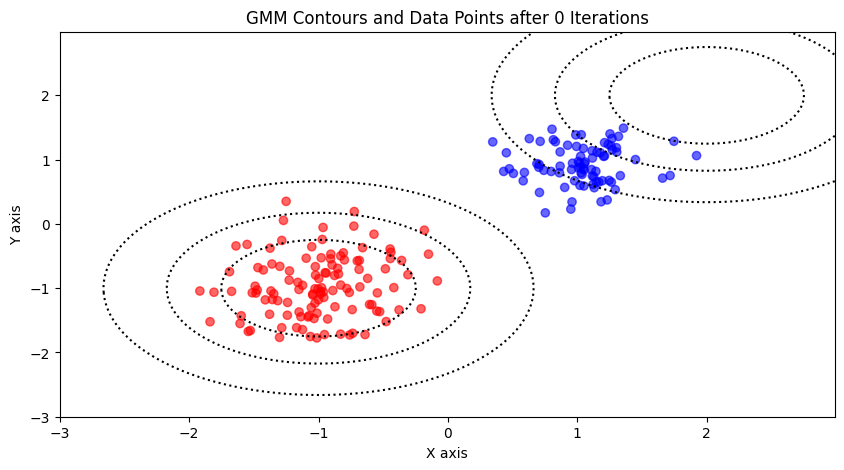

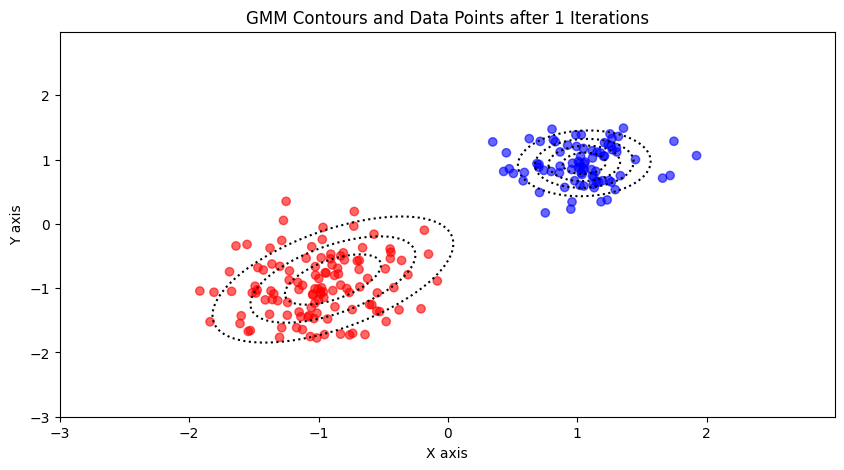

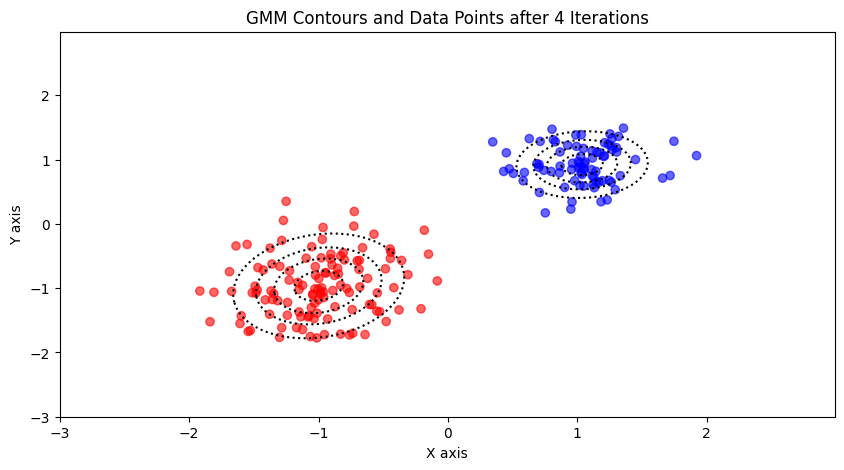

Converged after 4 iterations for tol = 0.001


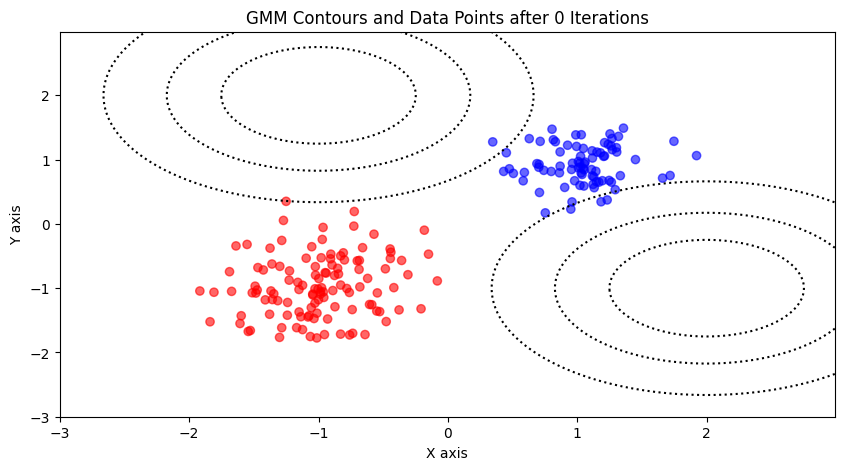

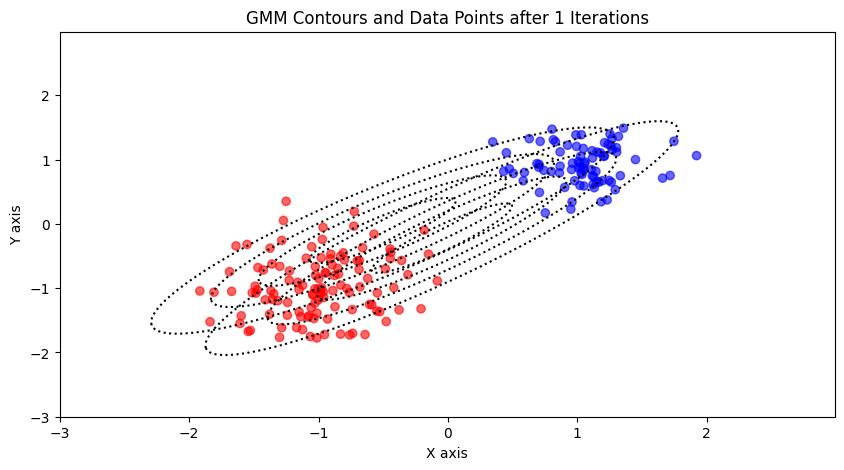

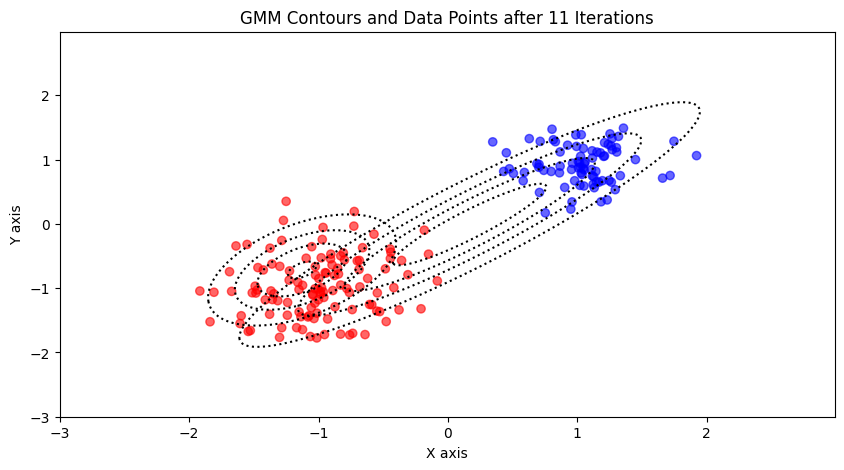

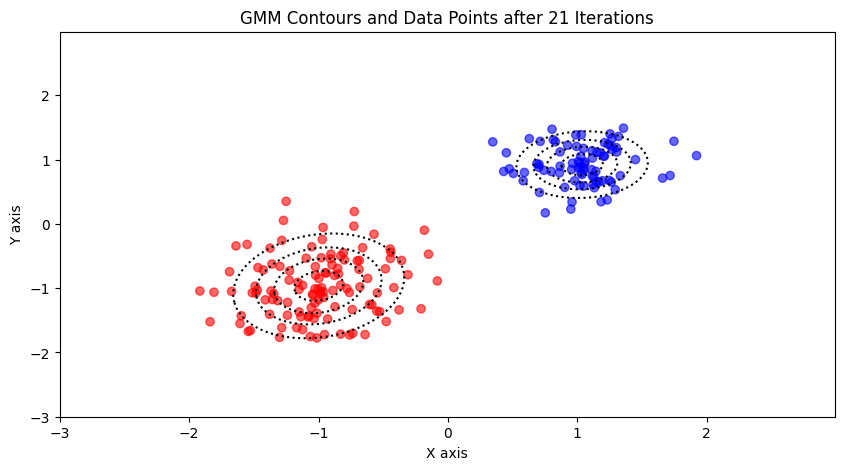

Converged after 21 iterations for tol = 0.001


In [143]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################

#1 - Different Initialization 

N = 200       #number of input examples
data,labels = generateData([0.6,0.4],[mu1 ,mu2], [sig1_s, sig2_s], N)    #data to run EM-algorithm ,  #labels  
D = 2       #data dimension
M = 2       #no.of components in GMM

max_iter = 100  #Number of steps to run EM algorithm
tol = 1e-3    #Tolerance for log-likelihood convergence

# (a) Parameters Set 1 
pi =  np.array([0.5, 0.5])     #Initialize the prior probabilities
mu = np.array([[2,2],[-1,-1]])     #Initialize the mean vectors
sigma = [np.eye(D), np.eye(D)]  #Initialize the covariance matrices

iter1 = Illustration_of_EM_algo(data,labels,pi,mu,sigma,max_iter,tol,printing=True)

# (b) Parameters Set 2
pi =  np.array([0.2, 0.8])     #Initialize the prior probabilities
mu = np.array([[-1,2],[2,-1]])     #Initialize the mean vectors
sigma = [np.eye(D), np.eye(D)]  #Initialize the covariance matrices

iter2 = Illustration_of_EM_algo(data,labels,pi,mu,sigma,max_iter,tol,printing=True)



In [145]:
print(f'Number of iterations to converge for parameters set 1 = {iter1+1}')
print(f'Number of iterations to converge for parameters set 2 = {iter2+1}')

Number of iterations to converge for parameters set 1 = 4
Number of iterations to converge for parameters set 2 = 21


Observations

**Impact of Initialization on Convergence**:

- **Parameter Set 1 (Converged in 4 iterations)**: With a more balanced initial guess of prior probabilities (pi = \[0.5, 0.5\]) and mean vectors (mu = \[\[2,2\],\[-1,-1\]\]), the EM algorithm converged quickly, in only 4 iterations. This suggests that the initial parameters were likely closer to the true parameters of the underlying data distribution.
- **Parameter Set 2 (Converged in 21 iterations)**: With an unbalanced initialization of prior probabilities (pi = \[0.2, 0.8\]) and mean vectors chosen further from the apparent data clusters (mu = \[\[-1,2\],\[2,-1\]\]), the algorithm took 21 iterations to converge. This indicates that the initial guesses were further from the true distribution, and it took more iterations for the algorithm to adjust the parameters to fit the data.


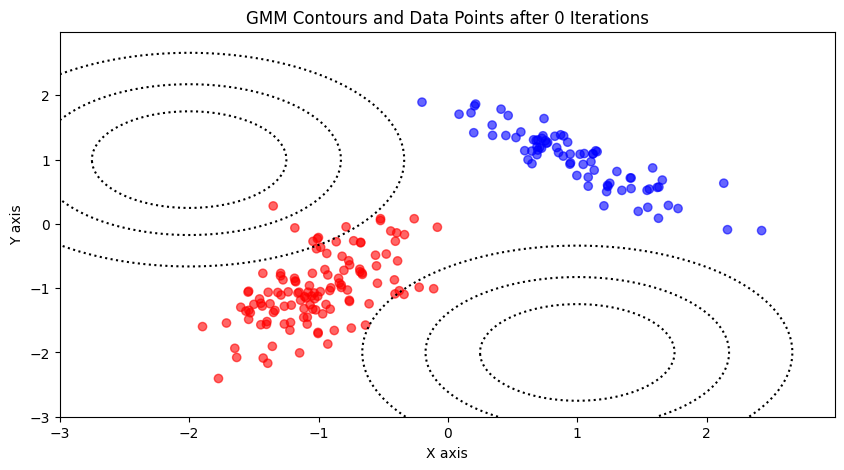

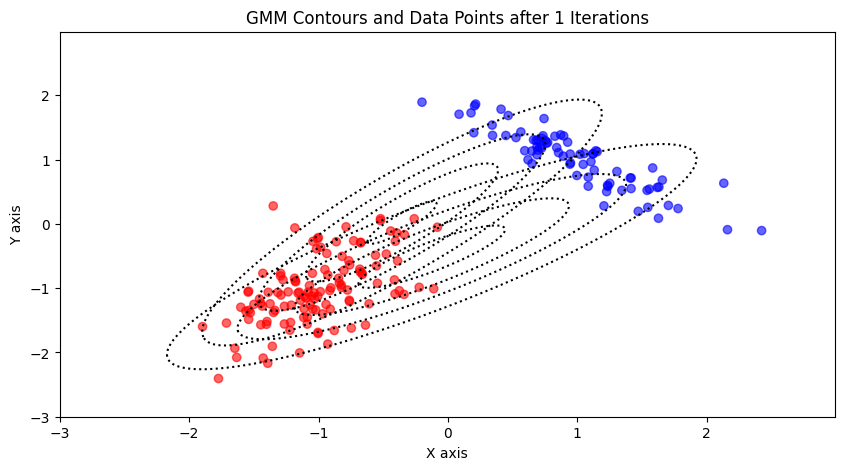

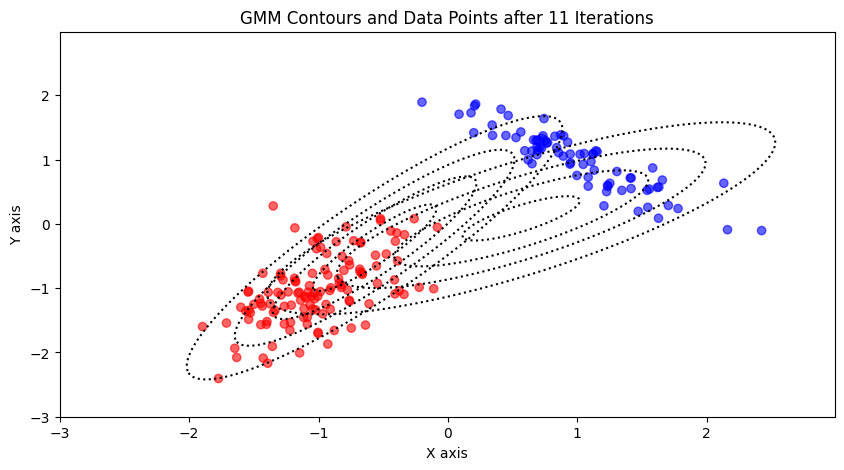

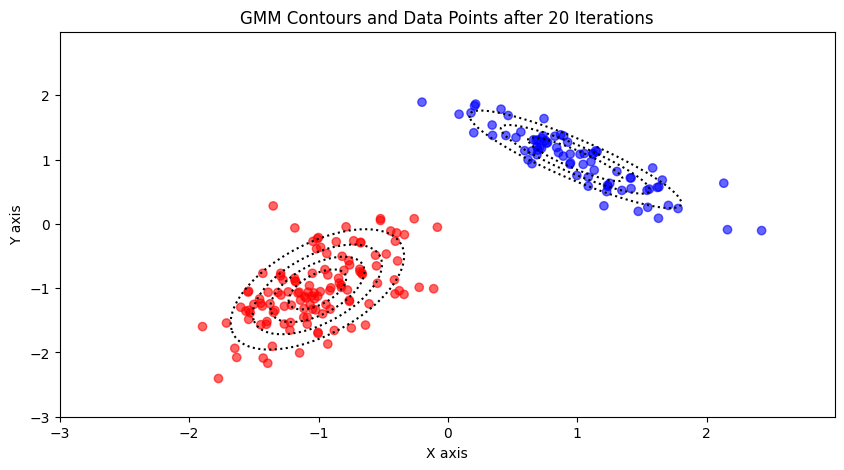

Converged after 20 iterations for tol = 0.001


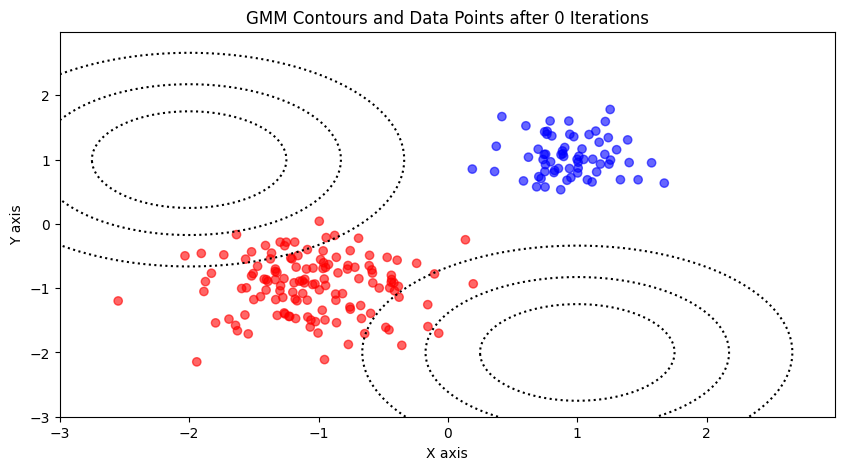

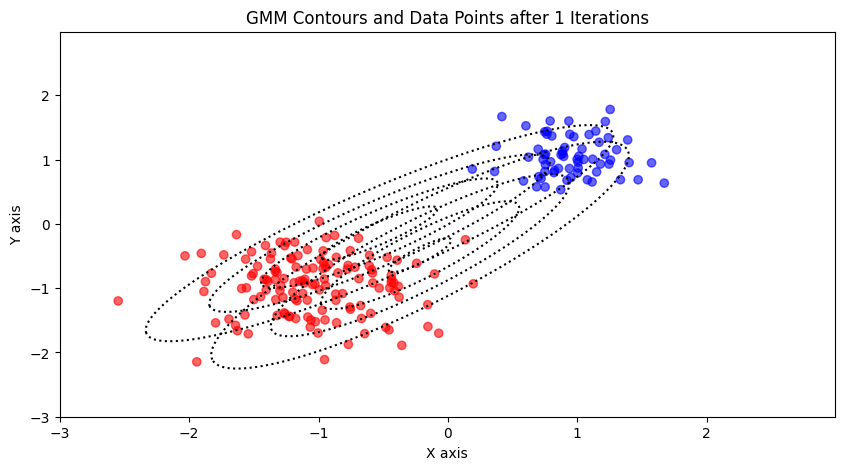

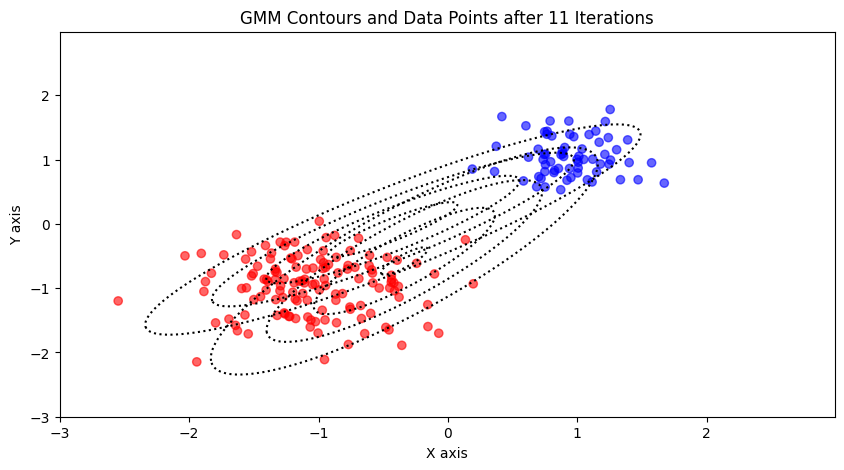

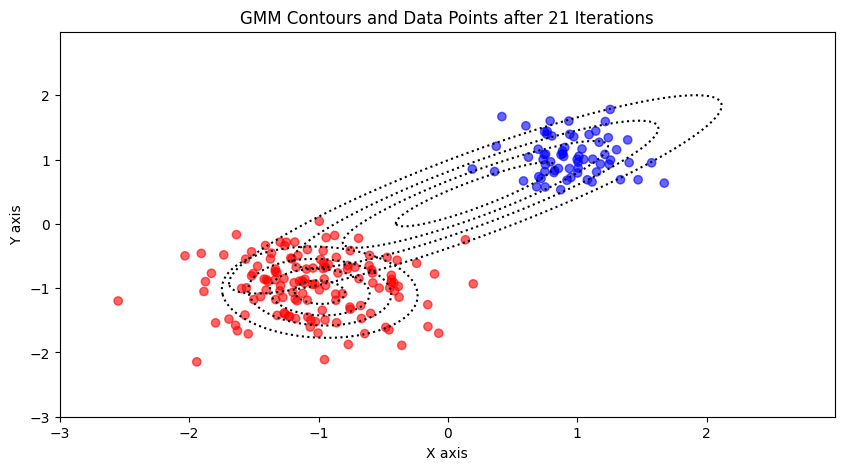

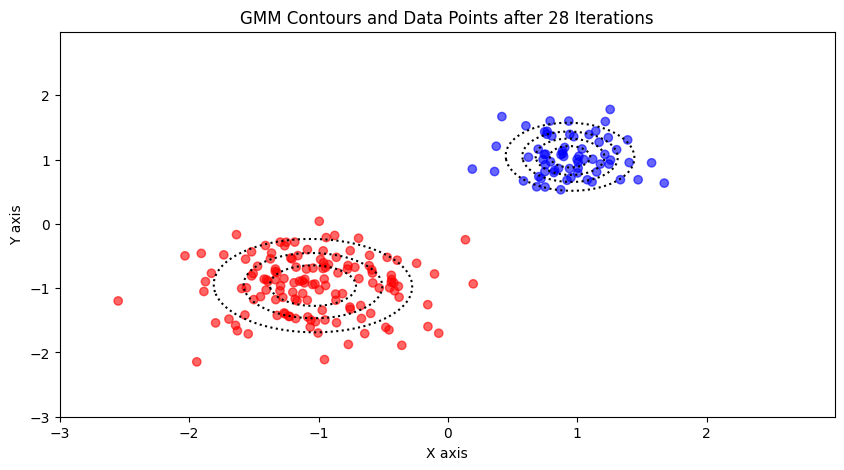

Converged after 28 iterations for tol = 0.001


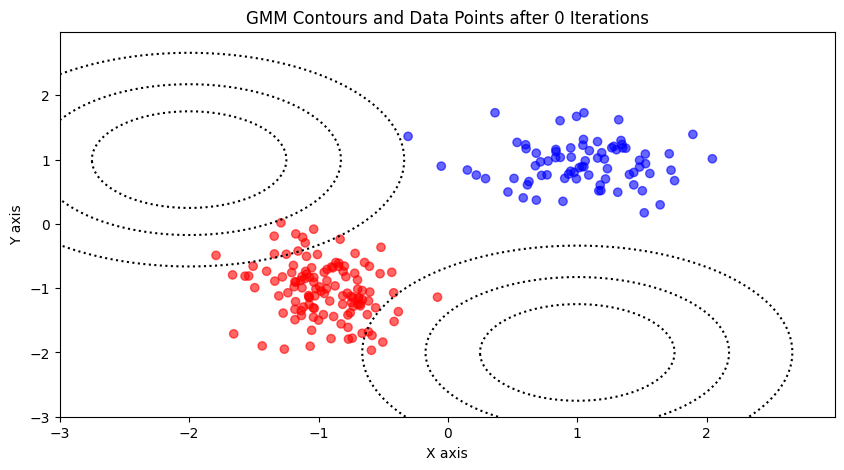

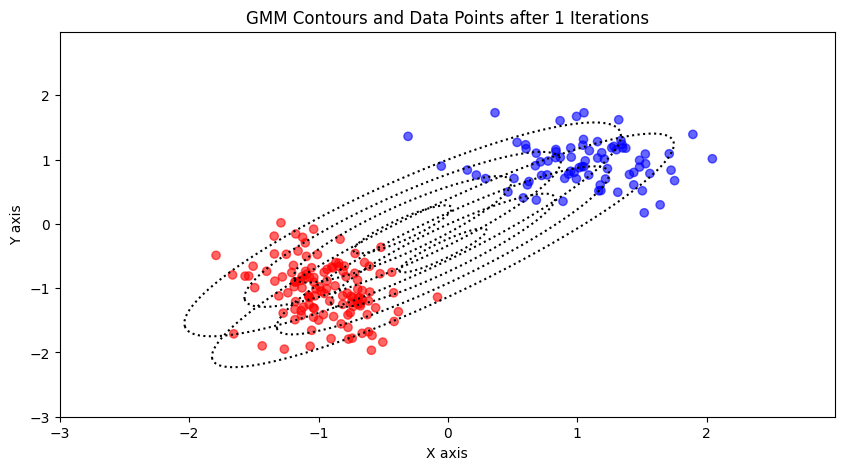

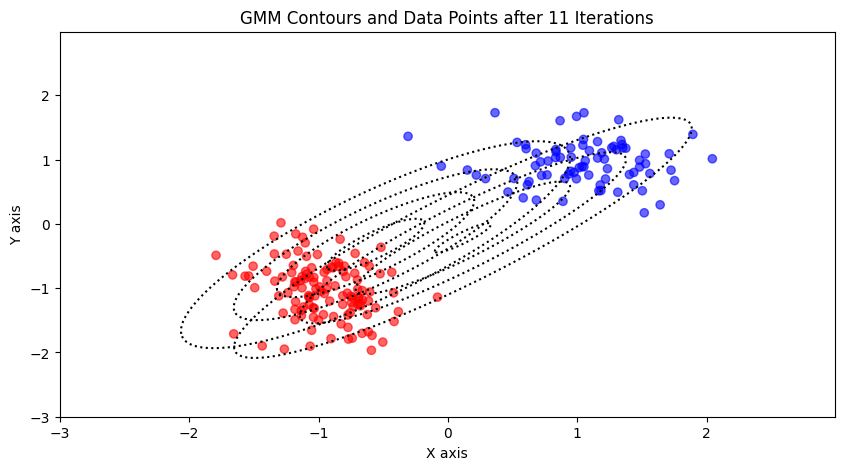

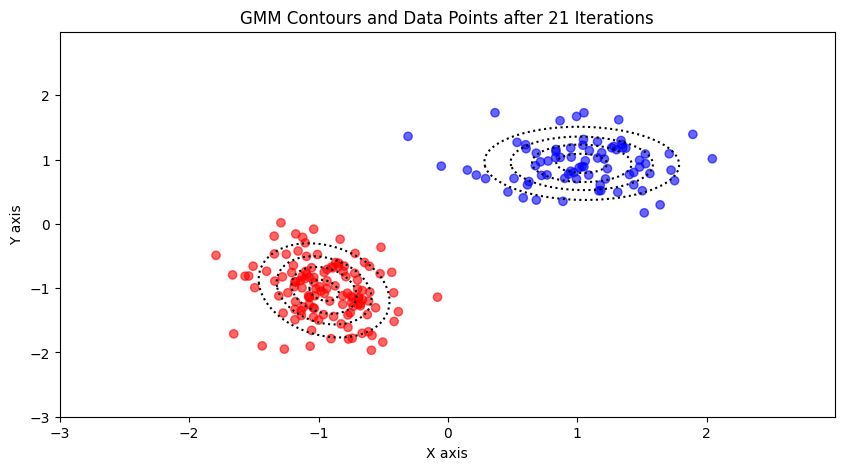

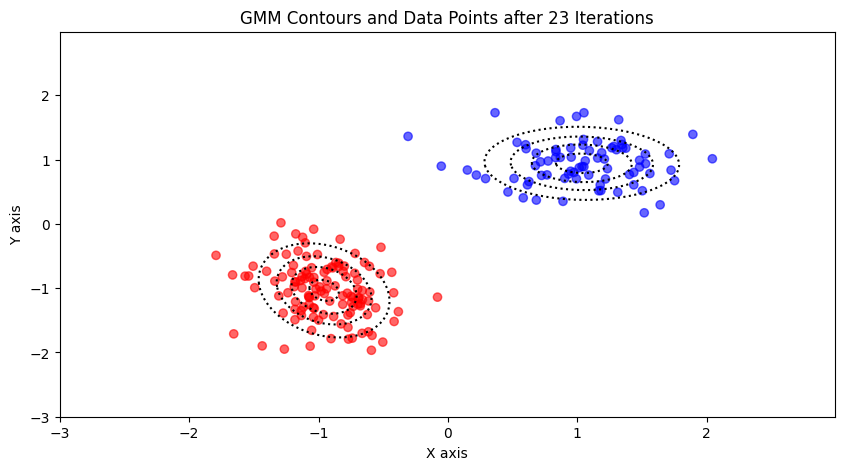

Converged after 23 iterations for tol = 0.001


In [146]:
# Trying for different covariances
mu1 = np.array([-1,-1])   #Mean vector of component1 in GMM
mu2 = np.array([1,1])   #Mean vector of component2 in GMM

# Full covariances
sig1_f = np.array([[0.15,0.1],[0.1,0.25]])   #Full covariance matrix of component1 in GMM
sig2_f = np.array([[0.3,-0.25],[-0.25,0.25]])  #Full covariance matrix of component2 in GMM

# Spherical covariances
sig1_s = np.array([[0.2,0],[0,0.2]])    
sig2_s = np.array([[0.1,0],[0,0.1]])   

# Diagonal covariances
sig1_d = np.array([[0.1,0],[0,0.2]])    
sig2_d = np.array([[0.2,0],[0,0.1]])   

N = 200       #number of input examples
max_iter = 100  #Number of steps to run EM algorithm
tol = 1e-3    #Tolerance for log-likelihood convergence
 
#Initial guess
pi =  np.array([0.5, 0.5])
mu = np.array([[-2,1],[1,-2]])     
sigma = [np.eye(D), np.eye(D)]  
 
D = 2       #data dimension
M = 2       #no.of components in GMM

# (a) Full covariances
data,labels = generateData([0.6,0.4],[mu1 ,mu2], [sig1_f, sig2_f], N)
iter_full = Illustration_of_EM_algo(data,labels,pi,mu,sigma,max_iter,tol,printing=True)

# (b) Spherical covariances
data_sp,labels_sp = generateData([0.6,0.4],[mu1 ,mu2], [sig1_s, sig2_s], N)
iter_sp = Illustration_of_EM_algo(data_sp,labels_sp,pi,mu,sigma,max_iter,tol,printing=True)

# (c) Diagonal covariances
data_dg,labels_dg = generateData([0.6,0.4],[mu1 ,mu2], [sig1_d, sig2_d], N)
iter_dg = Illustration_of_EM_algo(data_dg,labels_dg,pi,mu,sigma,max_iter,tol,printing=True)

In [147]:
print(f'Number of iterations to converge for full covariances = {iter_full}')
print(f'Number of iterations to converge for spherical covariances = {iter_sp}')
print(f'Number of iterations to converge for diagonal covariances = {iter_dg}')

Number of iterations to converge for full covariances = 19
Number of iterations to converge for spherical covariances = 27
Number of iterations to converge for diagonal covariances = 22


Observations

- **Impact of Covariance Type on Convergence**:

  - The EM algorithm took **19 iterations** to converge when using **full covariance matrices**. This indicates that the complexity of the covariance structure is well-matched to the data, and the algorithm can quickly find a good fit.
  - For **spherical covariances**, the algorithm required **27 iterations** to converge. Spherical covariances assume that the data is distributed equally in all directions and that the features are uncorrelated.
  - The convergence took **22 iterations** when using **diagonal covariances**. This suggests that the diagonal covariance is a more accurate assumption than spherical but less complex than full covariance.

- **Visualization of Initial Contours**:

  - The initial contours shown in all three images are the same, as they are based on the initial guess of the parameters before running the EM algorithm. The contours are centered around the initial mean guesses, and the shapes are spherical due to the identity matrices used as initial covariance estimates.

- **Influence of Covariance Assumption on Convergence**:
  - The differences in convergence times reflect the ability of each covariance type to model the true underlying distribution of the data. Full covariances offer more flexibility and hence adapt to the data structure more accurately and quickly.
  - Spherical and diagonal covariances introduce specific constraints to the model that could either simplify the computation or require more iterations to reach a fit that is good enough to model the data.
